# Analyse de données de films

Nous proposons de travailler sur des données décrivant des films. Les possibilités sont larges et vous êtes évalués sur vos propositions et votre méthodologie plus que sur vos résultats.

Les données de départ sont disponibles sur:
https://grouplens.org/datasets/movielens/
au format CSV. 

Nous nous intéresserons en particulier au jeu de données: **MovieLens 20M Dataset**. Dans ce jeu de données, vous disposez entre autre de:
* Idendifiant du film dans IMdb et TMdb (ça sera important ensuite)
* Catégorie(s) du film
* Titre du film
* Notes données par les internautes aux films

Afin de rendre le projet plus intéressant, nous ajoutons des données sur les acteurs et producteurs associés aux films (récupéré sur TMdb). Ces données sont disponibles sur les liens suivants:

http://webia.lip6.fr/~guigue/film_v2.pkl <br>
http://webia.lip6.fr/~guigue/act_v2.pkl <br>
http://webia.lip6.fr/~guigue/crew_v2.pkl

Ces fichiers contiennent respectivement : une nouvelle description des films (dont l'identifiant TMdb et la note moyenne donnée par les internautes, la date de sortie,...), une description des acteurs de chaque film et une description des équipes (scénariste, producteur, metteur en scène) pour chaque film.

Ces données sont des listes de taille 26908, chaque élément de la liste correspondant à un dictionnaire dont vous étudierez les clés pour récupérer les informations utiles.

**ATTENTION** Les contraintes de récupération d'informations en ligne font que la base MovieLens compte 27278 films mais les fichiers ci-dessus n'en comptent que 26908. Le plus simple est probablement d'éliminer les films de MovieLens qui ne sont pas dans cette seconde base.

## Consignes générales pour l'analyse des données

Vous devez proposer plusieurs analyses des données, qui devront à minima utiliser les
 techniques suivantes:
 
1. Mettre en forme les données pour identifier les acteurs et les catégories, les indexer
1. Traiter au moins un problème de régression supervisé (par exemple la prédiction de la note moyenne donnée à un film par les internautes).
1. Traiter au moins un problème de classification supervisé (par exemple la prédiction de la catégorie d'un film)
1. Utiliser les données catégorielles (catégories, acteurs,...) de manière discrète ET de manière coninue (*dummy coding*) dans des approches différentes
1. Proposer au moins une approche de catégorisation non supervisée (pour regrouper les acteurs par exemple)
1. Mener une campagne d'expérience permettant de comparer les performances sur un problème en fonction des valeurs d'un paramètre (et donc, in fine, trouver la meilleure valeur du paramètre)
1. Proposer quelques illustrations

In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#%matplotlib inline
import pickle as pkl
import matplotlib.pyplot as plt

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

#importation de Kmoyenne
from iads import kmoyennes as km
import random

import os

movies_pd = pd.read_csv('./MovieLens-20M/movies.csv')
ratings_pd = pd.read_csv('./MovieLens-20M/ratings.csv')




In [2]:
movies_pd

movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
7            8                                Tom and Huck (1995)   
8            9                                Sudden Death (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
11          12                 Dracula: Dead and Loving It (1995)   
12          13                                       Balto (1995)   
13          14                                       Nixon (1995)   
14          15                            Cutthroat Island (1995)   
15          16                                      Casino (1995)   
16          17                       Sense and Sensibility (1995)   
17          18                                  Four Rooms (1995)   
18          19              Ace Ventura: When Nature Calls (1995)   
19          20                                 Money Train (1995)   
20          21                                  Get Shorty (1995)   
21          22                                     Copycat (1995)   
22          23                                   Assassins (1995)   
23          24                                      Powder (1995)   
24          25                           Leaving Las Vegas (1995)   
25          26                                     Othello (1995)   
26          27                                Now and Then (1995)   
27          28                                  Persuasion (1995)   
28          29  City of Lost Children, The (Cité des enfants p...   
29          30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
...        ...                                                ...   
27248   131146                      Werner - Volles Rooäää (1999)   
27249   131148                                  What A Man (2011)   
27250   131150         7 Dwarves: The Forest Is Not Enough (2006)   
27251   131152                                 The Fat Spy (1966)   
27252   131154  Die Bademeister – Weiber, saufen, Leben retten...   
27253   131156                         Ants in the Pants 2 (2002)   
27254   131158                                Manta, Manta (1991)   
27255   131160                  Oscar and the Lady in Pink (2009)   
27256   131162                      Por un puñado de besos (2014)   
27257   131164                               Vietnam in HD (2011)   
27258   131166                                  WWII IN HD (2009)   
27259   131168                                     Phoenix (2014)   
27260   131170                                   Parallels (2015)   
27261   131172                              Closed Curtain (2013)   
27262   131174                                   Gentlemen (2014)   
27263   131176                             A Second Chance (2014)   
27264   131180                     Dead Rising: Watchtower (2015)   
27265   131231                                     Standby (2014)   
27266   131237                         What Men Talk About (2010)   
27267   131239                          Three Quarter Moon (2011)   
27268   131241                           Ants in the Pants (2000)   
27269   131243                Werner - Gekotzt wird später (2003)   
27270   131248                              Brother Bear 2 (2006)   
27271   131250                              No More School (2000)   
27272   131252  Forklift Driver Klaus: The First Day on the Jo...   
27273   131254                       Kein Bund für's Leben (2007)   
27274

In [3]:
ratings_pd

userId  movieId  rating   timestamp
0              1        2     3.5  1112486027
1              1       29     3.5  1112484676
2              1       32     3.5  1112484819
3              1       47     3.5  1112484727
4              1       50     3.5  1112484580
5              1      112     3.5  1094785740
6              1      151     4.0  1094785734
7              1      223     4.0  1112485573
8              1      253     4.0  1112484940
9              1      260     4.0  1112484826
10             1      293     4.0  1112484703
11             1      296     4.0  1112484767
12             1      318     4.0  1112484798
13             1      337     3.5  1094785709
14             1      367     3.5  1112485980
15             1      541     4.0  1112484603
16             1      589     3.5  1112485557
17             1      593     3.5  1112484661
18             1      653     3.0  1094785691
19             1      919     3.5  1094785621
20             1      924     3.5  1094785598
21             1     1009     3.5  1112486013
22             1     1036     4.0  1112485480
23             1     1079     4.0  1094785665
24             1     1080     3.5  1112485375
25             1     1089     3.5  1112484669
26             1     1090     4.0  1112485453
27             1     1097     4.0  1112485701
28             1     1136     3.5  1112484609
29             1     1193     3.5  1112484690
...          ...      ...     ...         ...
20000233  138493    50872     3.5  1256750388
20000234  138493    51086     3.5  1255810566
20000235  138493    51662     4.5  1255856908
20000236  138493    51884     4.5  1256294768
20000237  138493    52579     4.0  1255856957
20000238  138493    52975     4.0  1256680293
20000239  138493    53123     4.0  1255816320
20000240  138493    53125     3.0  1255810649
20000241  138493    53322     4.0  1255812146
20000242  138493    53464     4.0  1260209920
20000243  138493    53996     4.5  1259865104
20000244  138493    55269     5.0  1255816088
20000245  138493    55814     5.0  1255811181
20000246  138493    56757     3.0  1255810698
20000247  138493    56801     3.0  1255809988
20000248  138493    58879     4.5  1255816798
20000249  138493    59315     4.0  1255818138
20000250  138493    59725     3.0  1255818078
20000251  138493    59784     5.0  1255816901
20000252  138493    60069     4.0  1258134687
20000253  138493    60816     4.5  1259865163
20000254  138493    61160     4.0  1258390537
20000255  138493    65682     4.5  1255816373
20000256  138493    66762     4.5  1255805408
20000257  138493    68319     4.5  1260209720
20000258  138493    68954     4.5  1258126920
20000259  138493    69526     4.5  1259865108
20000260  138493    69644     3.0  1260209457
20000261  138493    70286     5.0  1258126944
20000262  138493    71619     2.5  1255811136

[20000263 rows x 4 columns]

In [4]:
ratings=ratings_pd.sort_values(by="movieId",axis=0)
ratings=ratings.groupby(by="movieId")["rating"].mean()

ratings


movieId
1         3.921240
2         3.211977
3         3.151040
4         2.861393
5         3.064592
6         3.834930
7         3.366484
8         3.142049
9         3.004924
10        3.430029
11        3.667713
12        2.619766
13        3.272416
14        3.432082
15        2.721993
16        3.787455
17        3.968573
18        3.373631
19        2.607412
20        2.880754
21        3.581689
22        3.319400
23        3.148235
24        3.199849
25        3.689510
26        3.628857
27        3.413520
28        4.057546
29        3.952230
30        3.633880
            ...   
131146    4.000000
131148    4.000000
131150    4.000000
131152    0.500000
131154    3.500000
131156    4.000000
131158    4.000000
131160    4.000000
131162    2.000000
131164    4.000000
131166    4.000000
131168    3.500000
131170    3.500000
131172    1.000000
131174    3.500000
131176    4.500000
131180    2.500000
131231    3.500000
131237    3.000000
131239    4.000000
131241    4.000000
1312

In [5]:
class MoindreCarre:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension, kernel, epsilon):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        self.dimension=input_dimension
        self.kernel=kernel
        self.epsilon=epsilon
        self.w=np.random.rand(self.dimension)
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        res=np.dot(self.w,self.kernel.transform(x))
        return res

    def train(self,nbIter, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        for i in range(nbIter):
            indice=random.randint(0,labeledSet.size()-1)
            m1 = np.multiply(2,self.epsilon)
            m2 = np.multiply(self.kernel.transform(labeledSet.getX(indice)),\
                                  (labeledSet.getY(indice)-self.predict(labeledSet.getX(indice))))
            self.w += np.multiply(m1,m2)
            
    def accuracy(self,labeledSet):
        accuracy_percentage = 0
        for ex in range(labeledSet.size()):
            score = self.predict(labeledSet.getX(ex))
            if score > labeledSet.getY(ex)-0.5 and score < labeledSet.getY(ex)+0.5:
                accuracy_percentage += 1
                
        return accuracy_percentage*100.0/labeledSet.size()

In [6]:
def split(lset,pourcent):
        train=ls.LabeledSet(lset.getInputDimension())
        test=ls.LabeledSet(lset.getInputDimension())
        size=lset.size()
        aleatoire=[i for i in range(size)]
        random.shuffle(aleatoire)
        for i in range(len(aleatoire)):
            if (i<pourcent*size/100):
                train.addExample(lset.getX(aleatoire[i]),lset.getY(aleatoire[i]))
            else:
                test.addExample(lset.getX(aleatoire[i]),lset.getY(aleatoire[i]))
                
        return test,train
    

In [7]:
categorie=[]
for index,row in movies_pd.iterrows(): 
    for i in row["genres"].split("|"):
        if i not in categorie:
            categorie.append(i)
    
categorie.sort()
categorie

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [8]:
movies_set=ls.LabeledSet(len(categorie))

for index,row in movies_pd.iterrows():
    tab_genre=[0]*20
    if row["movieId"] in ratings.keys():
        for i in row["genres"].split("|"):
            tab_genre[categorie.index(i)]=1
        movies_set.addExample(tab_genre,ratings.get_value(row["movieId"]))

print(movies_set.size())
    

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


26744


In [9]:
for i in range(26744):
    print(movies_set.getX(i),movies_set.getY(i))

[0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [3.92123956]
[0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [3.2119768]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.15104044]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.86139332]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.06459173]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.83493033]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.36648407]
[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.14204947]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.00492424]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.43002931]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.66771281]
[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.61976593]
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.27241615]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.43208236]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.72199313]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.78745544]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.96857309]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.3736306]
[0 0 0 0 0 1

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.81636107]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.40291262]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.05714286]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.92622951]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.80555556]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.67953625]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.58474576]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [3.50623886]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0] [3.19624915]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [2.12237221]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.125]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.04166667]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.94464084]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0] [2.73534158]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.73813809]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.97297297]
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.1673155]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] [3.77564103]
[0 0 0 0 0 1 0 0

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.59249564]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.22641509]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.37362637]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.0425]
[0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.93073593]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.52250712]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.08408216]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.37021976]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.29545455]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0] [3.16046099]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.26210307]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.39334638]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.05603938]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0] [3.70067698]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.21922529]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.36781609]
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0] [3.09670398]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.03418308]
[0 0 0 1 1 0 0

[0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1] [2.97209302]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.26655629]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.32483128]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.34270765]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0] [2.51096594]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.61287115]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.63676259]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.2802498]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.22457246]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.39921023]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0] [2.15242718]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.61222957]
[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [3.6765024]
[0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [3.21613527]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0] [3.63677722]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.64905549]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.33611111]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0] [2.92106938]
[0 0 0 0 0 0

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.445779]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [2.47641509]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.38610039]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.73886094]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0] [2.36666667]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.8785489]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.64444444]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.32795699]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.53278689]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.81175214]
[0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0] [3.28597101]
[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [3.23494182]
[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.21601686]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0] [3.15953654]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.70337079]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.00302115]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0] [2.90337423]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.1921875]
[0 0 0 0 0 0 0

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0] [3.43692308]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.10344828]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.27860697]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.41666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.35135135]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.25454545]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.78209765]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.16666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.4]
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0] [3.]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.80202743]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.6122449]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0] [3.66799522]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0] [2.72310571]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.68096447]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.46694215]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0] 

[0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.43333333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.15217391]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.31818182]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.171875]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.51695616]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.312]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.78582555]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.43589744]
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.22850679]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.40272727]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.2014218]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.76239669]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.81419006]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.15151515]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.16666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.38571429]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.67032967]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.3902439]
[0 0 0 1 1 0 0 0 0 

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [4.01687534]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.41732283]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.69672131]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0] [3.24418605]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.72687645]
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [2.7826087]
[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.57267951]
[0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.11267606]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0] [3.43229167]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.17692308]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.48170732]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.46324879]
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0] [2.66153082]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.52104055]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.28481013]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0] [2.95637584]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.62630208]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.40942029]
[0 0 0 0 0 

[0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0] [3.47701149]
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0] [3.74960128]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.45876289]
[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0] [3.01724138]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.78717201]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.52295597]
[0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0] [3.18857143]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.86334405]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0] [3.63040238]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.5583815]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.38709677]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.38265306]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.96791444]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.29477612]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0] [3.08418367]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.67495637]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.24736842]
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0] [3.50757576]
[0 0 1 0 0 

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.34732824]
[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.31179775]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0] [3.23255814]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.99131064]
[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [2.64652087]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.38425926]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.45238095]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0] [3.42616822]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5875]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.13414634]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.94422151]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.375]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.8125]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.68292683]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0] [2.07995736]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.93719807]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.74820144]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.8125]
[0 0 0 0 0 0 0 0 1 0 0 0 0 

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [2.275]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.69409487]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0] [3.35408922]
[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0] [3.60185185]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.47959184]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0] [3.41481481]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.19565217]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1] [3.03125]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.66666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.10606061]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.97222222]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.5]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.625]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0] [2.90625]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.56944444]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0] [3.20909091]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0] [3.62068966]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0] [2.95751634]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.8131711]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.75]
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.81947262]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0] [3.45528455]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.23529412]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.52857143]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.77173913]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.93406593]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.34146341]
[0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.57346939]
[0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.7312296]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.65873016]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.46857143]
[0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.88543307]
[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0] [2.34323432]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.09375]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.63207547]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.3]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.91555711]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.32952381]
[0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.03183411]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.17424242]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.11020036]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.70416667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.22916667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.05]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.23529412]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.62857143]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.87978142]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.69512195]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] [3.84469697]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.18627451]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.97826087]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.78285714]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.04166667]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.93288591]
[0 0 0 0 0 0 1 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0] [3.60810811]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.57758621]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.08928571]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.13235294]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0] [3.39329268]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.60869565]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.8355615]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.43333333]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.74836601]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.69847328]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.65714286]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [3.63084112]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.93150685]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.64948454]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.92878049]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.83743169]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.8]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.77745784]
[0 0 1 0 0 0 1 0 1

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0] [3.02083333]
[0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.34375]
[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0] [3.7515528]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.81686047]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.73989899]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.64390244]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0] [1.21428571]
[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0] [3.56578947]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.5625]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.6]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.75462963]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.73943662]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.48314607]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.69911504]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.60833333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.83]
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0] [3.44117647]
[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0

[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.52358491]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.52777778]
[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [3.03333333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [2.27136752]
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.62559242]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.73809524]
[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.54807692]
[0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0] [3.22222222]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.84597156]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.31182796]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.86170213]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.92708333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.87931034]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.80952381]
[0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0] [3.59574468]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0] [3.50961538]
[0 0 0 0 0 1 0 0 1 0 0 

[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5375]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.45918367]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.28571429]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.14285714]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.03846154]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.56756757]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.84711779]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.65789474]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0] [3.08035714]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.64814815]
[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0] [3.26190476]
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.125]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.375]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.2]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [2.97142857]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0] [3.28409091]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.31147541]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.79545455]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.62313433]
[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0] [2.94230769]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [3.64285714]
[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0] [3.03571429]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.27027027]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0] [3.40404992]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.82209302]
[0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0] [3.27987013]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.99555556]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0] [2.83035714]
[0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.23366013]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0] [2.53232759]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.99281984]
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.31000782]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.11538462]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.46153846]
[0 0 0 0 0 1 0 0

[0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.20833333]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.07716702]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.66666667]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0] [3.16071429]
[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0] [3.66901408]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0] [2.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0] [3.125]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0] [3.25]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0] [3.22222222]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.6]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.83333333]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.56751825]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.44578313]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.60377358]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.70138889]
[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.17241379]
[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.38287561]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.65196078]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.96666667]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.35714286]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.83333333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.66666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.25]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.66935484]
[0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [3.43637184]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.4]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.85714286]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.33898305]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0] [3.57692308]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.40909091]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.96666667]
[0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0] [3.57692308]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.51865672]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.97916667]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.5918259]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [2.68604651]
[0 0 0 0 0 0 0 0 1 1 0 0

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.12037037]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.43636364]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.54444444]
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.375]
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0] [3.6075]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [2.625]
[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0] [3.75471698]
[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0] [3.69476744]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0] [3.93432324]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.36764706]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0] [2.98705502]
[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [2.72008547]
[0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0] [3.05189295]
[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [3.27330508]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.95918367]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0] [2.7303523]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0] [3.9]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

[0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0] [3.15]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0] [3.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.72916667]
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.66666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0] [3.7]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0] [3.5]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.78571429]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.2]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0] [3.5]
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0] [2.75]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [2.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [3.1]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.83333333]
[0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.10526316]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [2.92857143]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.69565217]
[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0] [3.30769231]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.83633634]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.57523148]
[0 0 0 0 0 0 0 1

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.21428571]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0] [2.4787234]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [3.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.08333333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0] [3.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0] [2.87943262]
[0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [3.12288136]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.86742424]
[0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [3.61627907]
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.74736842]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0] [2.61139896]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.77272727]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.67980296]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.5]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.29220779]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.25]
[0 0

[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.1]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.21428571]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.7]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.83928571]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.74285714]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.875]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [2.31818182]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.125]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.66666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.57692308]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.1509434]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [3.25]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1] [1.75]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [2.66666667]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.66666667]
[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0] [3.4375]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0] [3.40880503]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.1]
[0 0 0 0 0

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.4]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.8]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.42857143]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.66666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.16666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.66666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [1.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.6875]
[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0] [3.71428571]
[0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.72707424]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0] [3.31707317]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.125]
[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.16666667]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.25]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0] [2.75]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.75]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.55]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.5]
[0 0 0 0 0 1 0 0 0 0 0 0 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [2.5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [2.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0] [2.79032258]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.33333333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.546875]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.46428571]
[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0] [2.5814978]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.67365772]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.96153846]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.22222222]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1] [3.13157895]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.8452381]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.65]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0] [3.6]
[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0] [2.58333333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.64197531]
[0 0 1 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0] [3.3125]
[0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0] [3.05]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.64285714]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0] [2.45]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.64804469]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.39285714]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.4375]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.25]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.3125]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0] [3.08333333]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.25]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.44444444]
[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0] [3.27777778]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0] [3.28571429]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.35294118]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.46153846]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.73529412]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.71153846]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.28571429]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.71830986]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.59722222]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.95]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.14285714]
[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0] [1.9]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.8]
[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0] [2.75]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0] [1.45]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0] [1.71428571]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.64566929]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.91666667]
[0

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.33333333]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.375]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.625]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.25]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.16666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.25]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.43307087]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0] [2.41666667]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.58333333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.6538

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0] [2.16666667]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0] [3.20967742]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0] [2.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0] [2.5]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0] [2.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0] [2.66666667]
[0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0] [3.375]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0] [3.25]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.57142857]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 1 0 0 0

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.66666667]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [3.14]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0] [3.2]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.83333333]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0] [3.59184783]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0] [3.17607973]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.08333333]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.6875]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.45238095]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.34210526]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.4]
[0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0] [2.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.08333333]
[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0] [3.04166667]
[0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.58660131]
[0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0] [3.03448276]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.85]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0] [4.25]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.]
[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [2.78125]
[0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0] [3.53846154]
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.40740741]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.82758621]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.96511628]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.32480315]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0] [2.88049451]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.2]
[0 0 0 0 0 0 0 1

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.47727273]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0] [2.42405063]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [4.75]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.72222222]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.3]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.8]
[0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0] [2.875]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.72222222]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.4]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 1 0 0 0 0 

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0] [2.83333333]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.65384615]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.82758621]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.68181818]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0] [3.64423077]
[0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.16666667]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.91176471]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0] [1.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.33695652]
[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0] [2.41666667]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [1.75]
[0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0] [2.66666667]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.38888889]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0] [3.27659574]
[0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0] [2.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [4.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.]
[0 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.33333333]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.16666667]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0] [3.5]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [3.625]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [2.91176471]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.91666667]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.39285714]
[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [3.]
[0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0] [2.83333333]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.33333333]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.625]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.38888889]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [2.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0] [1.]
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.16666667]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0] [3.63636364]
[0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0] [3.30952381]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.93023256]
[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.35714286]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [2.6]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.4]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0] [1.75]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [1.75]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [4.]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0] [4.2]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [2.]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [5.]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0] [3.2826087]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0] [3.07142857]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.68181818]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.625]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.]
[0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.91666667]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.75]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.83333333]
[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0] [3.25]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [2.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [2.25]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0] [3.66666667]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0] [3.21428571]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1] [2.]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.625]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.75]
[0 0 0 0 0 0 0 0 0 

[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.7]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.34722222]
[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0] [3.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0] [3.875]
[0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0] [3.5625]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0] [3.49186992]
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.5]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.25]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.2]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.07475083]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.93644354]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.75]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.80555556]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.85245902]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.75]
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0] [1.4375]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [4.]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.9]
[0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [0.5]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0] [3.25]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.37719298]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.84782609]
[0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0] [2.83333333]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [2.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [4.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [4.25]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0] [3.28947368]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [3.5]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0] [3.42857143]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [4.]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.16666667]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0] [3.5]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.28571429]
[0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0] [4.]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0] [4.]
[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [3.16666667]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0] [2.5]
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.60526316]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.1]
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [2.5]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [1.75]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.21428571]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [1.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.875]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0] [2.75]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0] [4.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0] [3.]


[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0] [3.5]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.5]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.5]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.]
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.25]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [5.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.875]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0] [2.5]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.7

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.66666667]
[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0] [2.14285714]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [1.88888889]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] [3.75]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.25]
[0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1] [2.]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [1.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0] [2.5]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.5]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 1 0 0 1 0 0 1 0 0 0 

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0] [1.]
[0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0] [1.5]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] [3.]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [4.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0] [3.]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.5]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [3.]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0] [3.24]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [2.71428571]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.5]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.75]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1.75]
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0] [3.5]
[0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0] [2.375]
[0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [2.5]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 

In [10]:
def split(labeledSet,percentage):

    rand_array = np.random.choice(labeledSet.size(),size=labeledSet.size(),replace=False)
    
    test=ls.LabeledSet(labeledSet.input_dimension)
    train=ls.LabeledSet(labeledSet.input_dimension)
    y=percentage*labeledSet.size()/100
    j=0
    for i in rand_array:
        
        if(j<y):
            test.addExample(labeledSet.getX(i),labeledSet.getY(i));
        else:
            train.addExample(labeledSet.getX(i),labeledSet.getY(i));
        j=j+1
    
    return test,train
   

In [11]:
class MoindreCarre:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension, kernel, epsilon):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        self.dimension=input_dimension
        self.kernel=kernel
        self.epsilon=epsilon
        self.w=np.random.rand(self.dimension)
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        res=np.dot(self.w,self.kernel.transform(x))
        if res<0:
            return -1
        else:
            return 1

    def train(self,nbIter, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        for i in range(nbIter):
            indice=random.randint(0,labeledSet.size()-1)
            m1 = np.multiply(2,self.epsilon)
            m2 = np.multiply(self.kernel.transform(labeledSet.getX(indice)),\
                                  (labeledSet.getY(indice)-self.predict(labeledSet.getX(indice))))
            self.w += np.multiply(m1,m2)
            
    def accuracy(self,labeledSet):
        accuracy_percentage = 0
        for ex in range(labeledSet.size()):
            score = self.predict(labeledSet.getX(ex))
            if score < 0 and labeledSet.getY(ex) == -1:
                accuracy_percentage += 1
            elif score >= 0 and labeledSet.getY(ex) == 1:
                accuracy_percentage += 1
        print(labeledSet.size())
        return accuracy_percentage*100.0/labeledSet.size()

In [12]:
#séparation test et entrainement de notre dataBase
test,train=split(movies_set,50)
print(test.size())
print(train.size())
class KernelPoly:
    def transform(self,x):
        polynom=[1]
        for i in x:
            polynom.append(i)
        for i in x:
            polynom.append(i*i)
        for i in range(len(x)-1):
            polynom.append(x[i]*(x[i]+1))
        return polynom


13372
13372


In [13]:
k=KernelPoly()
classifieur=MoindreCarre(60,k,0.1)

In [14]:
classifieur.train(i,train)
print(classifieur.accuracy(test))

13372
0.7777445408315884


## Chargement des données (base MovieLens + enrichissements)

In [15]:
import os

# Chargement des données MovieLens
links = pd.read_csv("./MovieLens-20M/links.csv", encoding='utf8')
links

movieId   imdbId    tmdbId
0            1   114709     862.0
1            2   113497    8844.0
2            3   113228   15602.0
3            4   114885   31357.0
4            5   113041   11862.0
5            6   113277     949.0
6            7   114319   11860.0
7            8   112302   45325.0
8            9   114576    9091.0
9           10   113189     710.0
10          11   112346    9087.0
11          12   112896   12110.0
12          13   112453   21032.0
13          14   113987   10858.0
14          15   112760    1408.0
15          16   112641     524.0
16          17   114388    4584.0
17          18   113101       5.0
18          19   112281    9273.0
19          20   113845   11517.0
20          21   113161    8012.0
21          22   112722    1710.0
22          23   112401    9691.0
23          24   114168   12665.0
24          25   113627     451.0
25          26   114057   16420.0
26          27   114011    9263.0
27          28   114117   17015.0
28          29   112682     902.0
29          30   115012   37557.0
...        ...      ...       ...
27248   131146   184005    9496.0
27249   131148  1661461   73770.0
27250   131150   461642   10036.0
27251   131152    59171  233438.0
27252   131154   202806   11664.0
27253   131156   295375    9572.0
27254   131158   102397    1915.0
27255   131160  1242522   51880.0
27256   131162  3028412  258751.0
27257   131164  2109059  208982.0
27258   131166  1489097   56771.0
27259   131168  2764784  254578.0
27260   131170  3479316  328595.0
27261   131172  2626926  160171.0
27262   131174  2058617  287422.0
27263   131176  3305316  254200.0
27264   131180  3816458  293771.0
27265   131231  1645916  301225.0
27266   131237  1595366   35428.0
27267   131239  1747994   91628.0
27268   131241   239450    9478.0
27269   131243   304931   10470.0
27270   131248   465925   10010.0
27271   131250   248409    9565.0
27272   131252   289477    9677.0
27273   131254   466713    4436.0
27274   131256   277703    9274.0
27275   131258  3485166  285213.0
27276   131260   249110   32099.0
27277   131262  1724965  286971.0

[27278 rows x 3 columns]

In [16]:
# Chargement des données complémentaires

fname_acteurs = './TMdb/act_v2.pkl'
acteurs = pkl.load(open(fname_acteurs, 'rb'))


In [17]:

fname_films = './TMdb/film_v2.pkl'
film = pkl.load(open(fname_films, 'rb'))

In [18]:
filmm=pd.DataFrame(film)
#retirer les film qui ont moins de 20 votes
film_pd=filmm.loc[filmm['vote_count']>=20]
film_pd.shape

(15092, 14)

In [19]:
film_pd['vote_average'].unique()

array([7.9, 7.1, 6.5, 6.1, 7.8, 5.3, 5.7, 6.8, 6.6, 5.8, 7.2, 7. , 7.4,
       6.3, 6.2, 5.6, 6.4, 7.6, 7.5, 6.9, 6.7, 8.3, 8.2, 5.1, 6. , 4.8,
       4.4, 2.9, 4.1, 4. , 5.5, 4.7, 5.9, 8. , 3.9, 8.1, 4.3, 5.2, 5.4,
       7.3, 7.7, 4.2, 5. , 4.5, 4.9, 4.6, 8.4, 8.7, 8.5, 3.6, 3.8, 8.6,
       3.7, 3.2, 3. , 3.5, 3.4, 2.8, 3.3, 2.6, 3.1, 2.5, 1.7, 2.2, 2.3,
       1.9, 9.1, 2.7, 2.4, 2. , 8.8, 2.1])

In [20]:
vote=film_pd.loc[film_pd['vote_count']>100]
vote

adult                     backdrop_path                 genre_ids  \
0      False  /dji4Fm0gCDVb9DQQMRvAI8YNnTz.jpg           [16, 35, 10751]   
1      False  /7k4zEgUZbzMHawDaMc9yIkmY1qR.jpg           [12, 14, 10751]   
2      False  /1ENbkuIYK2taNGGKNMs2hw6SaJb.jpg               [35, 10749]   
4      False  /cZs50rEk4T13qWedon0uCnbYQzW.jpg                      [35]   
5      False  /jMzVSwQp1lLVq9fnQQ4yOjr1YZ2.jpg          [28, 80, 18, 53]   
6      False  /hSy5yZG18ogNQn1tHSlxSqV24cf.jpg               [35, 10749]   
8      False  /y6A4PUAD61r15CgtuuQhWxLh6Vx.jpg          [28, 12, 18, 53]   
9      False  /dA9I0Vd9OZzRQ2GyGcsFXdKGMz3.jpg              [12, 28, 53]   
10     False  /wmViVyE9P0HTVU54sP3EriCmtIc.jpg           [35, 18, 10749]   
11     False   /y7N276seR43H31xvDbWMWxEsDr.jpg                  [35, 27]   
12     False  /fkxHaPJaB35wnoUC7glF16W3lWH.jpg           [12, 16, 10751]   
13     False  /j1pLMvLiXRyeeHyTZO79a4t3Qao.jpg                  [18, 36]   
14     False  /qzH1yszhgTlT64tS24yBDPGaeHq.jpg                  [28, 12]   
15     False  /eP41pD4YfyVOjdpEaTmoNrL9DGx.jpg                  [80, 18]   
16     False  /ocn3pLKJjYmXIP2331pUNC33f5M.jpg               [18, 10749]   
17     False  /3EqYpbGCE9S5GddU2K4cYzP5UmI.jpg                  [80, 35]   
18     False  /qFYwztFX1gx9PZLnTEokQw5q04G.jpg              [12, 35, 80]   
19     False  /dBavxNhbNZ8uJU9avHrqCCEKuii.jpg              [28, 35, 80]   
20     False  /g1BfxcnplYEveGqS1ttfhdRBgbR.jpg              [35, 53, 80]   
21     False  /gE1DHa82NZVb9B2Lx2cLNz43Iwd.jpg                  [18, 53]   
22     False  /5OGlGPKphapyntNprVaoxF04Ccm.jpg          [28, 12, 80, 53]   
23     False  /rJ5SMe5OkLG0PMETSVjrTX3bsmc.jpg         [18, 14, 878, 53]   
24     False  /2gJDuPxrZBns5ab47HQbyU2l6Im.jpg               [18, 10749]   
26     False  /dthtFNHGLgo360zpRKhKOWgZrRe.jpg           [35, 18, 10751]   
28     False  /sVJKC83CDSrsNdfwyceTUJewbKV.jpg             [14, 878, 12]   
30     False  /ah39cSwqSgloyIhl6wuMk4bOhbN.jpg                  [18, 80]   
31     False  /6KXbhaxkgExC5EdDqAzRinhmoZ8.jpg           [878, 53, 9648]   
33     False  /67jzzA7YqDTR5qIUhAH32cvkf53.jpg       [14, 18, 35, 10751]   
35     False  /f6WMgACY6VQnGpz9L4eQ3hkfcJE.jpg                      [18]   
37     False  /5Pok9TVLoAp72PIFcoDbACcCBA9.jpg        [35, 10749, 10751]   
...      ...                               ...                       ...   
26707  False  /mO1ZrsrbnpWRL5BaV4M6BlJdNxL.jpg    [18, 28, 80, 53, 9648]   
26708  False  /fdP1YTHyskg4zH8Ap41Wczf5yWG.jpg              [35, 18, 14]   
26735  False  /lHSUzTi0c7jFQ8G00r6pKWWqY6K.jpg                      [18]   
26745  False  /meBkkSnF0BNbG0bezGzC8Y97D8L.jpg  [12, 18, 14, 878, 10751]   
26750  False  /4CsN1lql08Xq7Otb5YCiHYffH4X.jpg        [18, 10749, 10752]   
26754  False  /xOKGkKwfK79xjmBd1EiIbPpc71k.jpg         [28, 12, 878, 53]   
26756  False  /rMAGfqQBpX1ooCFNubYO1bw70UI.jpg              [28, 12, 53]   
26757  False  /12MnwXHzZeGOK0XNmCoxsf5HnuV.jpg                      [35]   
26761  False  /lMOEweTIAaCMxMIfX0H9qT55rTR.jpg      [28, 12, 16, 18, 14]   
26762  False  /A7N6vmO1Jo8K1uCQyrgorxjHNPw.jpg          [28, 12, 14, 16]   
26763  False  /5xP4GjW0xk3yODB9c5UIBPbsGbH.jpg      [28, 12, 16, 18, 14]   
26764  False  /hNuopzyelAp6PaOvwB2QG6JCPLu.jpg                      [18]   
26767  False  /6xjBbCZp3bXFps5ET1Y4zfq6bws.jpg  [14, 35, 16, 878, 10751]   
26769  False  /jzFbhWeFWDyphN7iZDsTEeqw2vX.jpg                   [10749]   
26774  False  /jVU1bRNcXCfX9LC8pj9Hp9McN7x.jpg              [28, 18, 80]   
26777  False  /gbwOFHXSLi1DD3D7eI2vlZWIAyq.jpg               [53, 10749]   
26782  False  /1TlSBnlgWhtMVRx7Lf0R2vmwZcw.jpg                      [18]   
26785  False  /3DRFtq83y3FHqvh9nvgM3lMNh3t.jpg              [18, 27, 53]   
26798  False  /fLLzQ7dCvPnuam9ftkcU6hSZ28P.jpg          [27, 10749, 878]   
26799  False  /k3jh1UqObpmyZU8nHRBjHzoQTRB.jpg             [28, 12, 878]   
26823  False  /8dHsvdiZLBdppKwRiZ0XZYngbeN.jpg         

In [21]:

fname_equipes = './TMdb/crew_v2.pkl'
crew = pkl.load(open(fname_equipes, 'rb'))

## Feature engineering
A vous de créer les caractéristiques de description des données qui permettront d'améliorer les performances dans les tâches que vous aurez choisi d'aborder dans le projet.

In [22]:
# Faire un dictionnaire avec tous les acteurs (acteur => indice)
# + un dictionnaire inversé (indice => acteur)
actors = dict()
actors_inv = dict()
for lista in acteurs:
    for a in lista:
        # affecte une valeur à une clé si la clé n'est pas utilisée
        res = actors.setdefault(a['name'], a['gender'])
        if res == len(actors)-1:
            actors_inv[len(actors)-1] = a['name']

# Exemple de transformation supplémentaire
# Dans combien de films de base joue Tom Hanks? (Réponse 57)
# Dans combien de comédies...

# => On voit qu'il est possible de créer facilement des nouvelles caractéristiques qui
# apporteront des informations utiles pour certaines tâches

In [23]:
actors

{'Tom Hanks': 2,
 'Tim Allen': 2,
 'Don Rickles': 2,
 'Jim Varney': 2,
 'Wallace Shawn': 2,
 'John Ratzenberger': 2,
 'Annie Potts': 1,
 'John Morris': 2,
 'Erik von Detten': 2,
 'Laurie Metcalf': 1,
 'R. Lee Ermey': 2,
 'Sarah Freeman': 1,
 'Penn Jillette': 2,
 'Sherry Lynn': 1,
 'Jack Angel': 2,
 'Spencer Aste': 0,
 'Greg Berg': 2,
 'Lisa Bradley': 0,
 'Kendall Cunningham': 0,
 'Debi Derryberry': 1,
 'Cody Dorkin': 0,
 'Gregory Grudt': 0,
 'Sam Lasseter': 0,
 'Brittany Levenbrown': 1,
 'Bill Farmer': 2,
 'Craig Good': 2,
 'Danielle Judovits': 0,
 'Scott McAfee': 2,
 "Ryan O'Donohue": 2,
 'Jeff Pidgeon': 2,
 'Patrick Pinney': 2,
 'Phil Proctor': 2,
 'Jan Rabson': 2,
 'Joe Ranft': 0,
 'Andrew Stanton': 2,
 'Shane Sweet': 2,
 'Nathan Lane': 2,
 'John Lasseter': 2,
 'Ernie Sabella': 2,
 'Robin Williams': 2,
 'Jonathan Hyde': 2,
 'Kirsten Dunst': 1,
 'Bradley Pierce': 2,
 'Bonnie Hunt': 1,
 'Bebe Neuwirth': 1,
 'David Alan Grier': 2,
 'Patricia Clarkson': 1,
 'Adam Hann-Byrd': 2,
 'Laura 

In [24]:
#Non superviser: index=index de ligne et row=la ligne
acteurDsFilm=dict()
for index,row in film_pd.iloc[:len(acteurs)//10].iterrows():
    listeAct=[]
    for a in acteurs[index]:
        listeAct.append(a['name'])
    acteurDsFilm[row['title']]=listeAct

In [25]:
acteurDsFilm

{'Toy Story': ['Tom Hanks',
  'Tim Allen',
  'Don Rickles',
  'Jim Varney',
  'Wallace Shawn',
  'John Ratzenberger',
  'Annie Potts',
  'John Morris',
  'Erik von Detten',
  'Laurie Metcalf',
  'R. Lee Ermey',
  'Sarah Freeman',
  'Penn Jillette',
  'Sherry Lynn',
  'Jack Angel',
  'Spencer Aste',
  'Greg Berg',
  'Lisa Bradley',
  'Kendall Cunningham',
  'Debi Derryberry',
  'Cody Dorkin',
  'Gregory Grudt',
  'Sam Lasseter',
  'Brittany Levenbrown',
  'Bill Farmer',
  'Craig Good',
  'Danielle Judovits',
  'Scott McAfee',
  "Ryan O'Donohue",
  'Jeff Pidgeon',
  'Patrick Pinney',
  'Phil Proctor',
  'Jan Rabson',
  'Joe Ranft',
  'Andrew Stanton',
  'Shane Sweet',
  'Nathan Lane',
  'John Lasseter',
  'Ernie Sabella'],
 'Jumanji': ['Robin Williams',
  'Jonathan Hyde',
  'Kirsten Dunst',
  'Bradley Pierce',
  'Bonnie Hunt',
  'Bebe Neuwirth',
  'David Alan Grier',
  'Patricia Clarkson',
  'Adam Hann-Byrd',
  'Laura Bell Bundy',
  'James Handy',
  'Gillian Barber',
  'Brandon Obray',
 

In [26]:
tslesact =set()
for i in acteurDsFilm.values():
    for j in i:
        tslesact.add(j)
len(tslesact)

32573

In [27]:
tslesacteurs_reduit = list(tslesact)[:5410]

In [28]:
filmDsActeur=dict()
for acteur in tslesact:
        listFilm=[]
        moyen=0
        for f in acteurDsFilm.keys():
            if acteur in acteurDsFilm[f]:
                listFilm.append(f)
        filmDsActeur[acteur]=listFilm
filmDsActeur

{'Dave King': ['Reds'],
 'Demetrius Navarro': ['One Eight Seven'],
 'Chad Timmerman': ['The Blue Lagoon'],
 'Nancy Young': ['True Romance', 'Species II'],
 'Adrienne King': ['Friday the 13th', 'Friday the 13th Part 2'],
 'Pierre Blondy': ['Grand Illusion'],
 'Magdalena Dandourian': ["Schindler's List"],
 'Damian Monk': ['Babe: Pig in the City'],
 'Robert Pemberton': ['The Boondock Saints'],
 'Senta Berger': ['Cross of Iron'],
 'Wilda Bennett': ['The Women', 'Ninotchka', 'The Lady Eve'],
 'Phil Nee': ['Volcano'],
 'Rick Touhy': ['The Negotiator'],
 'Gillian El-Kadi': ['Following'],
 'Carl Duering': ['A Clockwork Orange', 'The Boys from Brazil', 'Possession'],
 'Michael Gothard': ['Lifeforce', 'For Your Eyes Only'],
 'Michael Cavadias': ['Wonder Boys'],
 'Joyce Brothers': ['Exit to Eden',
  'Spy Hard',
  "National Lampoon's Loaded Weapon 1"],
 'Craig Richards': ['When a Man Loves a Woman'],
 'Michael H. Moss': ['The Night Flier'],
 'Julie Araskog': ['Se7en'],
 'Jayne Luke': ['Species'],


In [29]:
#Pour le clustering
acteurDsMovie=dict()
for index,row in film_pd.iloc[:len(acteurs)//10].iterrows():
    listeAct=[]
    movie_id = links.loc[links['tmdbId']==row['id']]['movieId'] #pour avoir movieId a partir de tmdbId
    if len(movie_id)==0:
        continue
    for a in acteurs[index]:
        listeAct.append(a['name'])
    acteurDsMovie[movie_id.values[0]]=listeAct

In [30]:
MovieDsActeur=dict()
for acteur in tslesact:
        listFilm=[]
        moyen=0
        for f in acteurDsMovie.keys():
            if acteur in acteurDsMovie[f]:
                listFilm.append(f)
        MovieDsActeur[acteur]=listFilm
MovieDsActeur

{'Dave King': [2929],
 'Demetrius Navarro': [1609],
 'Chad Timmerman': [2950],
 'Nancy Young': [555, 1862],
 'Adrienne King': [1974, 1975],
 'Pierre Blondy': [3134],
 'Magdalena Dandourian': [527],
 'Damian Monk': [2384],
 'Robert Pemberton': [3275],
 'Senta Berger': [3339],
 'Wilda Bennett': [927, 936, 2935],
 'Phil Nee': [7, 1515],
 'Rick Touhy': [2058],
 'Gillian El-Kadi': [2579],
 'Carl Duering': [1206, 3204, 3621],
 'Michael Gothard': [2377, 2989],
 'Michael Cavadias': [3317],
 'Joyce Brothers': [234, 743, 3208],
 'Craig Richards': [381],
 'Michael H. Moss': [1771],
 'Julie Araskog': [47],
 'Jayne Luke': [196],
 'Jon Kohler': [1460],
 'Catherine MacNeal': [2829],
 'Nick Brandon': [2879],
 'Patti Smith': [2354],
 'Carl Kent': [953],
 'Sing Chen': [952],
 'Everett McGill': [204, 1390, 2021, 2476, 2966, 2990, 3036],
 'Seiko Matsuda': [1917, 2718],
 'Lee Patrick': [903, 913, 2612, 3548],
 'Vincent Spano': [3250],
 'Pierre-Jean Rippert': [1131],
 'Anita Koh': [1527],
 'Roger Booth': [1

In [31]:
len(acteurDsFilm)
acteurDsFilm

{'Toy Story': ['Tom Hanks',
  'Tim Allen',
  'Don Rickles',
  'Jim Varney',
  'Wallace Shawn',
  'John Ratzenberger',
  'Annie Potts',
  'John Morris',
  'Erik von Detten',
  'Laurie Metcalf',
  'R. Lee Ermey',
  'Sarah Freeman',
  'Penn Jillette',
  'Sherry Lynn',
  'Jack Angel',
  'Spencer Aste',
  'Greg Berg',
  'Lisa Bradley',
  'Kendall Cunningham',
  'Debi Derryberry',
  'Cody Dorkin',
  'Gregory Grudt',
  'Sam Lasseter',
  'Brittany Levenbrown',
  'Bill Farmer',
  'Craig Good',
  'Danielle Judovits',
  'Scott McAfee',
  "Ryan O'Donohue",
  'Jeff Pidgeon',
  'Patrick Pinney',
  'Phil Proctor',
  'Jan Rabson',
  'Joe Ranft',
  'Andrew Stanton',
  'Shane Sweet',
  'Nathan Lane',
  'John Lasseter',
  'Ernie Sabella'],
 'Jumanji': ['Robin Williams',
  'Jonathan Hyde',
  'Kirsten Dunst',
  'Bradley Pierce',
  'Bonnie Hunt',
  'Bebe Neuwirth',
  'David Alan Grier',
  'Patricia Clarkson',
  'Adam Hann-Byrd',
  'Laura Bell Bundy',
  'James Handy',
  'Gillian Barber',
  'Brandon Obray',
 

In [32]:
film_pd.loc[film_pd['original_title']=="Jumanji"]['vote_average']

1    7.1
Name: vote_average, dtype: float64

In [33]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if valueToFind in item[1][0] :
            listOfKeys.append(item[0])
    return  listOfKeys


In [34]:
#moyenne de chaque film
acteurs_dans_film = dict()
tous_les_acteurs = set()
for index,row in movies_pd.iloc[:(len(acteurs)//5)].iterrows():
    liste_acteurs = list()
    for i in acteurs[index]:
        liste_acteurs.append(i['name'])
        tous_les_acteurs.add(i['name'])
    acteurs_dans_film[row['title']] = [liste_acteurs,[film[index].get('vote_average')]]

dict_acteurs_moy = dict()
for i in tous_les_acteurs:
    films = getKeysByValue(acteurs_dans_film,i)
    som = 0
    for j in films:
        som += acteurs_dans_film.get(j)[1][0]
    if len(films) == 0:
        dict_acteurs_moy[i] = som/(len(films)+1)
    else:
        dict_acteurs_moy[i] = som/len(films)


In [35]:
dict_acteurs_moy['Justin Brady']

6.3

In [36]:
movies_pd.loc[movies_pd['title'].str.contains("The Time Machine")]["movieId"]

Series([], Name: movieId, dtype: int64)

## Classification
Déterminer le genre d'un l'acteur à partir du nombre des films auquels il a participé, la note moyenne des films et années moyennes.


In [37]:
def anneeMoyenne(listeDeFilm):
    moyenne=0
    for i in listeDeFilm:
        something=film_pd.loc[film_pd['original_title']==i]
        if len(something)>0:
            moyenne+=int(something['release_date'].values[0].split("-")[0])
    return (moyenne/(len(listeDeFilm)*1.0))/100

    

In [38]:

genre_acteur_set=ls.LabeledSet(3)

for acteur in tous_les_acteurs:
    liste=list()
    if acteur in list(filmDsActeur.keys()):
        liste.append(len(filmDsActeur[acteur])) #nombre des films de l'acteur
        liste.append(anneeMoyenne(filmDsActeur[acteur])) #annee moyenne
        liste.append(dict_acteurs_moy[acteur]) #moyenne des films de l'acteur
    if actors[acteur]==1:
        label=1
    else:
        label= -1
    if liste != []:
        genre_acteur_set.addExample(liste, label)

In [39]:
list(filmDsActeur.keys())

['Dave King',
 'Demetrius Navarro',
 'Chad Timmerman',
 'Nancy Young',
 'Adrienne King',
 'Pierre Blondy',
 'Magdalena Dandourian',
 'Damian Monk',
 'Robert Pemberton',
 'Senta Berger',
 'Wilda Bennett',
 'Phil Nee',
 'Rick Touhy',
 'Gillian El-Kadi',
 'Carl Duering',
 'Michael Gothard',
 'Michael Cavadias',
 'Joyce Brothers',
 'Craig Richards',
 'Michael H. Moss',
 'Julie Araskog',
 'Jayne Luke',
 'Jon Kohler',
 'Catherine MacNeal',
 'Nick Brandon',
 'Patti Smith',
 'Carl Kent',
 'Sing Chen',
 'Everett McGill',
 'Seiko Matsuda',
 'Lee Patrick',
 'Vincent Spano',
 'Pierre-Jean Rippert',
 'Anita Koh',
 'Roger Booth',
 "Henry O'Neill",
 'Emilio Estevez',
 'Brinke Stevens',
 'Byron Shores',
 'Karroom Ben Bouih',
 'Dean Maddox Jr.',
 'Sam Gifaldi',
 'David Ramsey',
 'Howie Long',
 'John T. Murray',
 'Debra Christofferson',
 'Marylou Lim',
 'Rebecca Perle',
 'Bob Kirsh',
 'Viktorie Knotková',
 'Roger Rowland',
 'Tabitha Soren',
 'Gordon Lilo',
 'Jaye Davidson',
 'Mônica Torres',
 'Bhogwan S

In [40]:

for i in range(genre_acteur_set.size()):
    print(genre_acteur_set.getX(i),genre_acteur_set.getY(i))

[ 1.    19.81   6.025] [-1]
[ 1.   19.97  6.6 ] [-1]
[ 1.  19.8  5.9] [-1]
[ 2.    19.955  6.1  ] [1]
[ 2.    19.805  6.15 ] [1]
[1.  0.  7.8] [-1]
[ 1.   19.93  8.5 ] [-1]
[ 1.   19.98  5.4 ] [-1]
[ 1.   19.99  7.3 ] [-1]
[ 1.   19.77  7.05] [1]
[ 3.         19.39666667  7.4       ] [-1]
[ 1.   19.97  5.8 ] [-1]
[ 1.   19.98  6.9 ] [-1]
[ 1.   19.99  7.2 ] [-1]
[ 3.         19.76666667  7.4       ] [-1]
[ 2.   19.83  6.35] [-1]
[ 1.  20.   7.1] [-1]
[ 3.         19.94333333  5.15      ] [1]
[ 1.   19.94  6.6 ] [-1]
[ 1.   19.97  5.9 ] [-1]
[ 1.   19.95  8.3 ] [-1]
[ 1.   19.95  5.7 ] [1]
[ 1.   19.97  4.25] [-1]
[ 1.   19.99  5.  ] [1]
[1. 0. 7.] [-1]
[ 1.   19.98  5.8 ] [1]
[ 1.   19.46  8.2 ] [-1]
[ 1.   19.56  6.5 ] [-1]
[ 7.         17.07        6.57777778] [-1]
[ 2.    19.985  6.55 ] [1]
[ 1.   19.93  5.58] [-1]
[ 4.         19.505       7.48333333] [1]
[ 1.   19.86  7.8 ] [-1]
[ 1.   19.97  7.4 ] [-1]
[ 2.   19.85  6.9 ] [-1]
[ 2.         19.41        6.46666667] [-1]
[16.      

[ 3.    19.97   5.825] [-1]
[ 1.   19.97  5.3 ] [-1]
[ 4.     19.9475  6.54  ] [-1]
[ 1.   19.94  6.2 ] [-1]
[ 1.   19.98  6.  ] [1]
[ 1.   19.99  7.5 ] [-1]
[ 1.   19.98  6.3 ] [-1]
[ 1.   19.99  5.35] [-1]
[ 1.   19.45  7.9 ] [-1]
[ 1.   19.94  6.7 ] [1]
[1.  0.  8.3] [-1]
[ 1.  19.4  7.9] [-1]
[ 2.   19.35  7.  ] [-1]
[ 1.   19.62  7.5 ] [-1]
[ 1.   19.93  6.7 ] [-1]
[ 1.   19.95  6.6 ] [-1]
[ 1.   19.66  7.6 ] [-1]
[ 1.   19.99  6.2 ] [-1]
[1.  0.  7.4] [-1]
[ 1.   19.62  8.1 ] [-1]
[ 9.         19.87        6.97272727] [-1]
[ 2.    19.725  7.7  ] [-1]
[ 1.   19.84  7.7 ] [1]
[ 1.  19.9  7.2] [-1]
[ 1.         19.94        5.83333333] [-1]
[ 2.  19.7  6.8] [-1]
[ 1.   19.75  7.2 ] [-1]
[ 1.   19.63  7.9 ] [-1]
[ 1.   19.84  5.8 ] [-1]
[ 1.   19.91  6.3 ] [1]
[1.  0.  7.6] [-1]
[ 2.    19.975  5.95 ] [-1]
[ 1.   19.93  6.5 ] [-1]
[ 5.         15.942       6.07142857] [-1]
[ 1.         19.56        7.36666667] [-1]
[ 1.   19.94  7.2 ] [1]
[1.  0.  8.2] [-1]
[ 5.         19.952       

[ 1.   19.86  7.  ] [-1]
[ 1.   19.91  7.  ] [-1]
[ 1.   19.57  7.2 ] [1]
[ 2.         19.735       7.16666667] [1]
[1.  0.  6.5] [-1]
[ 1.  19.9  7.7] [1]
[ 1.  20.   5.5] [-1]
[ 3.         13.32666667  6.12      ] [-1]
[ 1.   19.39  6.35] [-1]
[ 2.    19.845  6.18 ] [-1]
[ 1.   19.39  5.9 ] [-1]
[ 6.         19.87        6.33846154] [-1]
[ 3.         19.95        6.03333333] [-1]
[ 1.   19.39  7.9 ] [-1]
[ 1.   19.99  6.45] [1]
[ 1.  19.4  7.5] [-1]
[ 1.   19.73  7.6 ] [-1]
[ 1.   19.91  7.  ] [-1]
[ 1.   19.82  5.  ] [1]
[ 1.  19.9  5.1] [-1]
[ 1.   19.96  7.  ] [-1]
[ 1.  19.9  7.3] [-1]
[ 1.   19.99  6.88] [1]
[ 1.   19.94  7.4 ] [-1]
[ 1.  20.   5.6] [-1]
[ 1.   19.96  6.5 ] [1]
[ 4.         19.9325      6.16666667] [-1]
[ 2.    19.815  6.4  ] [1]
[ 2.    19.865  6.95 ] [-1]
[3.    0.    8.025] [-1]
[ 1.   19.46  7.9 ] [-1]
[ 2.   19.96  5.8 ] [-1]
[ 1.   19.97  5.  ] [-1]
[ 4.         19.9825      6.48333333] [-1]
[ 1.   19.99  6.5 ] [1]
[ 1.   19.62  6.8 ] [-1]
[ 1.   19.95  6.

[ 1.   19.72  6.2 ] [-1]
[1. 0. 6.] [1]
[ 1.   19.86  7.7 ] [-1]
[ 1.   19.84  6.2 ] [-1]
[ 1.   19.98  5.6 ] [-1]
[ 3.    19.63   6.825] [-1]
[ 2.         19.93        5.93333333] [-1]
[ 1.   19.98  5.5 ] [-1]
[ 2.   19.95  7.  ] [-1]
[ 4.    19.875  6.48 ] [-1]
[ 1.   19.97  6.1 ] [1]
[ 1.   19.96  4.6 ] [1]
[ 3.         19.98333333  6.125     ] [1]
[ 1.   19.94  4.9 ] [-1]
[ 1.   19.63  8.2 ] [-1]
[ 1.  19.8  5.7] [-1]
[ 1.   19.32  6.75] [-1]
[ 1.   19.99  6.  ] [-1]
[ 1.   19.94  8.2 ] [1]
[ 1.  19.9  5.5] [1]
[ 1.   19.99  6.5 ] [1]
[ 1.   19.74  7.1 ] [-1]
[ 1.   19.61  7.3 ] [-1]
[ 1.   19.95  5.6 ] [1]
[ 1.   19.93  6.8 ] [1]
[ 1.   19.91  6.4 ] [-1]
[1.  0.  7.1] [-1]
[ 3.   19.97  6.  ] [-1]
[ 1.   19.97  6.8 ] [-1]
[ 2.    19.575  4.525] [-1]
[ 1.   19.62  8.  ] [-1]
[ 1.   19.93  4.7 ] [-1]
[1.  0.  6.2] [-1]
[ 1.  19.7  7.3] [1]
[ 1.   19.97  6.7 ] [-1]
[ 1.   19.97  7.6 ] [-1]
[ 1.   19.77  6.7 ] [-1]
[10.         19.971       6.27692308] [-1]
[1.   0.   7.75] [-1]
[ 1. 

[ 1.   19.99  6.  ] [-1]
[ 1.   19.86  5.8 ] [-1]
[ 1.   19.95  6.6 ] [1]
[1.  0.  6.2] [-1]
[11.         19.93636364  6.5952381 ] [-1]
[ 4.   19.91  6.98] [-1]
[ 1.   19.99  4.8 ] [-1]
[ 1.   19.53  7.9 ] [-1]
[10.    19.951  5.98 ] [-1]
[ 1.   19.94  7.05] [-1]
[ 1.  19.9  7.1] [1]
[ 1.   19.77  7.3 ] [-1]
[ 6.         19.885       6.15714286] [-1]
[1.  0.  7.6] [-1]
[ 1.   19.98  7.2 ] [-1]
[ 1.   19.94  7.1 ] [-1]
[ 1.   19.97  5.4 ] [1]
[ 1.   19.61  7.3 ] [-1]
[ 1.   19.77  8.2 ] [-1]
[ 1.   19.98  5.3 ] [-1]
[ 3.         19.39666667  7.275     ] [-1]
[ 1.   19.58  6.5 ] [-1]
[ 1.   19.93  6.8 ] [-1]
[ 1.   19.96  5.  ] [-1]
[1.  0.  7.1] [-1]
[ 1.   19.94  7.1 ] [-1]
[ 1.   19.98  5.5 ] [-1]
[ 2.   19.93  6.95] [1]
[ 4.         19.87        6.68333333] [-1]
[1.  0.  7.3] [-1]
[ 4.     19.9225  6.28  ] [-1]
[ 1.   19.98  6.  ] [-1]
[5.   7.92 7.5 ] [-1]
[ 4.         19.405       6.38333333] [-1]
[ 3.         19.55333333  6.83333333] [-1]
[ 2.   19.56  5.88] [-1]
[ 1.   19.99  7.2

[ 1.   19.82  7.3 ] [-1]
[ 1.   19.58  6.5 ] [-1]
[ 4.   19.92  5.7 ] [-1]
[ 1.   19.61  7.  ] [-1]
[ 1.  19.8  6.7] [-1]
[ 2.   19.98  7.25] [1]
[ 1.   19.73  7.2 ] [-1]
[ 2.         19.965       6.61666667] [-1]
[ 2.   19.74  7.25] [1]
[ 1.   19.73  7.6 ] [1]
[ 1.   19.56  7.3 ] [-1]
[ 2.         19.97        5.16666667] [-1]
[ 1.   19.39  5.9 ] [-1]
[ 1.   19.89  7.2 ] [-1]
[ 1.   19.94  5.9 ] [-1]
[ 1.   19.96  6.9 ] [-1]
[ 1.   19.96  7.5 ] [-1]
[ 1.   19.79  6.3 ] [1]
[1.  0.  7.4] [-1]
[ 1.   19.61  7.8 ] [-1]
[ 3.         19.94333333  6.6       ] [-1]
[ 1.   19.41  7.3 ] [-1]
[ 1.   19.97  6.9 ] [-1]
[ 1.   19.86  5.5 ] [1]
[ 1.  20.   6.8] [-1]
[ 1.   19.94  6.6 ] [1]
[ 2.    19.995  6.9  ] [-1]
[ 4.    19.435  6.96 ] [-1]
[ 1.   19.98  5.8 ] [-1]
[13.         19.94846154  6.50555556] [-1]
[ 1.   19.99  7.2 ] [-1]
[ 1.   19.39  5.9 ] [1]
[ 1.   19.94  6.5 ] [1]
[ 2.   19.87  6.4 ] [-1]
[ 1.   19.65  7.  ] [-1]
[ 2.    19.865  6.35 ] [1]
[ 1.   19.58  6.5 ] [-1]
[1.  0.  6.3] [

[ 1.  20.   7.2] [1]
[ 2.         19.98        6.76666667] [-1]
[ 1.   19.98  6.8 ] [-1]
[ 2.  19.7  7.4] [-1]
[ 1.   19.94  6.4 ] [1]
[ 1.   19.77  7.  ] [-1]
[ 5.         19.88        6.04285714] [-1]
[ 1.   19.39  7.5 ] [-1]
[ 1.   19.98  6.4 ] [-1]
[ 2.         19.905       6.66666667] [-1]
[ 2.   19.75  6.8 ] [-1]
[ 4.     19.9675  6.82  ] [-1]
[ 1.   19.95  6.2 ] [-1]
[ 3.         19.43333333  7.96666667] [-1]
[2.         9.97       6.83333333] [1]
[ 4.     19.8675  6.95  ] [-1]
[ 1.   19.95  5.6 ] [-1]
[ 1.   19.97  7.  ] [-1]
[ 1.   19.96  6.7 ] [-1]
[ 2.         19.955       6.66666667] [1]
[ 1.   19.99  7.9 ] [-1]
[ 1.   19.53  7.9 ] [1]
[ 1.   19.99  7.9 ] [-1]
[ 2.   19.78  7.65] [-1]
[ 2.    19.955  6.   ] [-1]
[ 1.   19.98  4.6 ] [1]
[ 1.   19.99  6.1 ] [-1]
[ 2.         19.905       6.53333333] [-1]
[ 1.   19.87  6.8 ] [-1]
[ 1.   19.96  6.9 ] [-1]
[ 1.   19.95  5.5 ] [-1]
[ 1.   19.99  3.7 ] [-1]
[ 2.   19.74  6.8 ] [-1]
[ 1.   19.98  6.1 ] [1]
[ 1.   19.92  7.  ] [-1]


[ 2.         19.94        5.46363636] [-1]
[ 1.   19.95  6.8 ] [-1]
[ 3.         19.84666667  7.2       ] [-1]
[ 1.   19.89  6.4 ] [1]
[ 1.   19.97  5.  ] [1]
[11.         19.86090909  6.88125   ] [-1]
[ 5.    11.776  6.65 ] [-1]
[ 1.   19.98  6.3 ] [-1]
[ 1.   19.98  7.05] [1]
[ 1.   19.94  6.6 ] [-1]
[ 1.   19.99  7.1 ] [-1]
[1.  0.  7.6] [-1]
[ 1.   19.94  7.1 ] [-1]
[ 1.   19.31  8.4 ] [-1]
[ 1.   19.95  6.5 ] [-1]
[1.  0.  7.2] [-1]
[11.        19.92       6.1952381] [-1]
[ 2.   19.99  6.35] [1]
[ 1.   19.91  8.3 ] [-1]
[ 1.   19.99  4.8 ] [-1]
[ 2.   19.97  6.9 ] [-1]
[ 2.         19.925       6.78333333] [1]
[ 2.    19.915  6.35 ] [1]
[ 1.   19.87  6.8 ] [-1]
[ 1.   19.68  7.3 ] [1]
[ 3.         19.95333333  5.76666667] [-1]
[ 1.   19.97  6.  ] [1]
[ 1.   19.95  6.5 ] [-1]
[ 1.   19.99  7.2 ] [-1]
[ 1.   19.98  4.2 ] [-1]
[ 1.  19.9  7.3] [-1]
[ 2.    19.395  7.   ] [1]
[ 1.   19.77  6.3 ] [1]
[ 4.         19.935       6.31818182] [-1]
[2.   9.99 6.5 ] [-1]
[ 1.   19.86  3.2 ] [

[ 2.    19.845  5.85 ] [-1]
[ 1.   19.84  7.2 ] [-1]
[ 3.         19.67        6.83333333] [-1]
[1.  0.  8.2] [-1]
[ 1.   19.97  6.1 ] [1]
[ 2.    19.945  7.1  ] [-1]
[ 1.   19.56  7.3 ] [-1]
[ 1.   19.94  6.6 ] [-1]
[ 1.   19.98  7.1 ] [-1]
[ 3.         19.94666667  5.73333333] [-1]
[ 1.   19.85  8.2 ] [-1]
[ 4.     19.7925  6.68  ] [-1]
[ 1.   19.98  6.4 ] [-1]
[ 1.   19.67  7.45] [1]
[ 1.   19.89  5.25] [-1]
[ 1.   19.94  7.2 ] [-1]
[ 2.    19.645  6.9  ] [-1]
[12.         19.95583333  6.29375   ] [-1]
[ 1.   19.96  6.8 ] [-1]
[ 1.   19.64  7.55] [-1]
[ 1.   19.97  5.  ] [-1]
[ 3.         19.95333333  6.6       ] [-1]
[ 1.   19.95  6.  ] [-1]
[ 1.   19.58  7.4 ] [-1]
[ 1.   19.62  7.5 ] [-1]
[ 1.   19.93  4.7 ] [-1]
[1.  0.  7.4] [-1]
[ 1.   19.68  7.35] [-1]
[ 1.   19.97  6.8 ] [-1]
[ 1.   19.94  7.5 ] [-1]
[ 1.   19.9   5.35] [-1]
[ 1.   19.53  7.2 ] [-1]
[ 1.   19.77  8.2 ] [-1]
[ 1.   19.99  5.44] [1]
[ 1.   19.96  5.8 ] [1]
[13.         19.95538462  6.25151515] [-1]
[ 1.   19.5

[ 3.         19.57666667  7.525     ] [1]
[ 7.   19.93  6.82] [1]
[3.         6.63666667 7.46666667] [-1]
[ 3.         19.65333333  7.7       ] [-1]
[ 3.         19.91666667  6.12      ] [-1]
[ 1.   19.95  5.85] [-1]
[ 5.         19.904       5.88571429] [-1]
[ 2.   19.86  6.7 ] [-1]
[ 1.   19.97  4.  ] [-1]
[ 1.   19.28  8.1 ] [1]
[ 1.   19.33  7.5 ] [1]
[ 1.   19.97  7.3 ] [-1]
[ 3.   19.98  6.5 ] [1]
[1.  0.  7.3] [-1]
[1.  0.  7.5] [-1]
[ 2.   19.45  7.7 ] [-1]
[ 2.    19.975  5.8  ] [-1]
[ 1.   19.39  7.1 ] [1]
[ 1.   19.99  6.2 ] [-1]
[ 1.   19.71  6.9 ] [-1]
[ 1.   19.95  7.2 ] [-1]
[ 1.   19.58  7.6 ] [1]
[ 1.   19.93  5.8 ] [-1]
[ 3.   19.38  6.84] [-1]
[ 1.   19.84  7.5 ] [-1]
[ 1.   19.95  7.8 ] [-1]
[ 1.   19.98  7.35] [-1]
[ 1.   19.82  6.7 ] [-1]
[ 2.   19.94  6.85] [-1]
[ 3.   19.94  6.6 ] [-1]
[ 1.   19.97  5.4 ] [-1]
[ 1.   19.61  7.6 ] [-1]
[ 1.         19.59        5.96666667] [-1]
[ 3.         13.25        6.47142857] [-1]
[ 1.   19.98  6.5 ] [-1]
[ 3.   19.93  6.76

[ 4.     19.8625  6.5   ] [-1]
[ 1.   19.89  6.4 ] [1]
[ 1.   19.97  7.05] [-1]
[ 4.      19.9625   6.34375] [1]
[ 1.   19.37  7.9 ] [-1]
[ 1.   19.98  5.7 ] [-1]
[ 2.         19.655       6.73333333] [-1]
[ 1.  20.   5.9] [-1]
[ 1.   19.81  5.35] [-1]
[ 1.   19.98  6.8 ] [1]
[ 5.    15.476  7.76 ] [1]
[ 1.   19.93  6.8 ] [-1]
[ 3.         19.80333333  6.475     ] [-1]
[ 4.         19.88        6.56666667] [1]
[ 1.   19.97  7.4 ] [-1]
[ 1.  19.9  8.4] [-1]
[ 1.   19.86  6.7 ] [-1]
[ 1.   19.83  6.7 ] [-1]
[ 1.   19.84  8.4 ] [-1]
[ 1.   19.89  7.7 ] [-1]
[1.  0.  6.7] [-1]
[ 1.   19.96  5.85] [-1]
[ 2.    19.445  7.425] [-1]
[ 1.   19.97  5.7 ] [-1]
[ 3.         19.98333333  5.88333333] [-1]
[ 2.    19.475  7.35 ] [1]
[ 1.   19.58  6.5 ] [-1]
[ 1.   19.95  6.1 ] [-1]
[ 1.   19.98  5.6 ] [1]
[ 1.    19.75   6.125] [-1]
[ 2.    19.495  7.   ] [1]
[ 1.   19.93  7.7 ] [-1]
[ 5.    19.952  6.6  ] [-1]
[2.  0.  7.8] [-1]
[ 1.   19.94  6.4 ] [-1]
[ 3.         19.73666667  7.325     ] [-1]
[ 1

[1.         0.         6.13333333] [-1]
[ 1.   19.44  7.  ] [-1]
[ 3.         19.91333333  5.4       ] [-1]
[ 2.    19.905  6.75 ] [-1]
[ 1.   19.49  8.1 ] [-1]
[ 8.      19.79125  6.45   ] [-1]
[ 2.   19.89  6.05] [-1]
[2.         9.905      7.23333333] [-1]
[ 1.   19.92  7.2 ] [-1]
[ 1.   19.95  6.9 ] [-1]
[ 1.   19.95  6.8 ] [-1]
[ 1.   19.94  6.2 ] [-1]
[ 5.         19.95        6.38888889] [-1]
[ 1. 20.  7.] [-1]
[ 1.   19.97  5.7 ] [1]
[ 1.   19.88  6.35] [1]
[ 4.    19.535  7.225] [-1]
[ 1.   19.45  6.5 ] [-1]
[ 1.   19.95  6.2 ] [-1]
[ 1.         19.99        5.93333333] [1]
[ 1.   19.92  7.  ] [-1]
[ 1.  19.9  6.7] [-1]
[ 1.   19.99  6.6 ] [-1]
[ 2.   19.43  7.5 ] [-1]
[ 4.     19.9625  6.46  ] [-1]
[ 2.    19.955  5.7  ] [-1]
[ 4.    19.895  5.85 ] [1]
[1.  0.  7.1] [-1]
[ 1.   19.98  6.3 ] [-1]
[1.  0.  7.2] [1]
[ 1.   19.96  6.5 ] [-1]
[ 2.  19.8  5.5] [-1]
[1.  0.  5.9] [-1]
[ 2.         19.715       5.73333333] [-1]
[1.  0.  7.5] [-1]
[ 1.   19.92  6.7 ] [-1]
[ 1.   19.98

[ 1.   19.86  6.5 ] [-1]
[ 6.         19.97833333  5.46363636] [-1]
[ 2.    19.715  6.55 ] [-1]
[1.  0.  7.5] [-1]
[ 1.   19.99  6.3 ] [-1]
[ 1.   19.99  5.95] [1]
[ 4.     19.4625  7.55  ] [1]
[ 1.   19.93  8.5 ] [-1]
[ 1.   19.25  7.6 ] [1]
[ 1.   19.88  6.8 ] [1]
[ 1.   19.56  6.55] [-1]
[ 1.   19.84  8.  ] [1]
[ 1.   19.93  5.  ] [-1]
[ 2.   19.97  5.35] [-1]
[ 1.   19.83  6.75] [1]
[ 1.   19.79  5.3 ] [-1]
[ 1.   19.89  6.3 ] [-1]
[ 1.   19.97  5.  ] [-1]
[1.  0.  7.2] [-1]
[ 3.         19.99333333  7.15      ] [-1]
[ 1.   19.69  7.7 ] [-1]
[ 2.         19.625       6.76666667] [-1]
[ 1.   19.58  6.5 ] [-1]
[ 1.   19.95  5.8 ] [1]
[ 1.   19.53  6.2 ] [-1]
[ 1.   19.98  6.4 ] [1]
[ 2.   19.81  6.6 ] [1]
[ 1.   19.71  5.3 ] [1]
[ 9.         19.90111111  6.55      ] [1]
[11.         19.92545455  6.36923077] [-1]
[ 1.  19.9  7.7] [-1]
[ 1.   19.97  6.3 ] [-1]
[ 1.   19.96  7.7 ] [-1]
[ 1.   19.91  6.  ] [-1]
[ 1.         19.95        6.73333333] [1]
[ 1.   19.86  6.3 ] [-1]
[ 1.   19.

[ 1.   19.86  6.4 ] [-1]
[ 3.         19.96        6.14285714] [-1]
[ 1.   19.93  6.7 ] [-1]
[ 1.   19.99  7.3 ] [-1]
[ 1.   19.71  7.4 ] [-1]
[ 1.   19.85  6.2 ] [-1]
[ 1.   19.98  6.5 ] [-1]
[ 1.   19.59  7.7 ] [-1]
[ 1.   19.99  6.6 ] [-1]
[ 1.   19.63  8.2 ] [-1]
[ 1.   19.99  6.1 ] [-1]
[ 6.         19.92833333  6.39      ] [1]
[ 1.   19.97  7.6 ] [1]
[1. 0. 7.] [-1]
[ 1.   19.95  7.5 ] [1]
[ 1.   19.88  5.8 ] [-1]
[ 1.   19.99  6.7 ] [1]
[ 1.   19.84  7.2 ] [-1]
[ 1.   19.55  7.3 ] [1]
[ 1.   19.84  8.4 ] [-1]
[ 8.         19.97375     6.32857143] [1]
[ 1.   19.96  5.35] [1]
[ 1.   19.96  6.5 ] [-1]
[ 1.   19.84  6.8 ] [-1]
[ 1.   19.73  6.8 ] [-1]
[ 3.    13.12   7.025] [-1]
[ 2.    19.415  7.8  ] [1]
[ 1.   19.89  7.8 ] [-1]
[ 1.   19.83  7.  ] [-1]
[ 2.   19.8   8.25] [-1]
[ 1.   19.45  5.9 ] [-1]
[ 1.  19.8  8.3] [-1]
[ 1.   19.98  8.  ] [-1]
[ 1.   19.93  6.5 ] [-1]
[ 1.   19.82  7.25] [-1]
[ 2.    19.955  7.2  ] [-1]
[ 2.         19.96        5.83333333] [-1]
[ 1.   19.96  

[ 1.   19.98  6.9 ] [-1]
[1.  0.  7.7] [-1]
[ 1.   19.99  7.1 ] [-1]
[ 1.   19.99  8.1 ] [-1]
[1. 0. 7.] [-1]
[ 2.   19.98  5.95] [1]
[ 1.    19.95   4.575] [-1]
[ 1.   19.77  7.3 ] [-1]
[ 1.   19.85  6.9 ] [-1]
[ 1.   19.99  6.  ] [-1]
[ 6.         19.91        6.18181818] [1]
[ 1.   19.84  6.3 ] [-1]
[ 1.   19.84  6.8 ] [-1]
[ 2.   19.96  7.1 ] [-1]
[1.  0.  7.6] [-1]
[ 1.   19.92  7.2 ] [-1]
[ 1.    19.98   6.825] [1]
[ 1.   19.93  5.9 ] [1]
[ 1.   19.74  6.5 ] [-1]
[ 1.   19.85  7.8 ] [-1]
[ 2.    19.385  7.3  ] [-1]
[ 1.   19.96  4.6 ] [1]
[ 3.   19.72  6.36] [-1]
[ 2.   19.41  7.2 ] [-1]
[ 1.  19.9  5.5] [1]
[2.         9.84       6.36666667] [-1]
[ 1.  19.9  7.2] [1]
[ 1.   19.92  7.  ] [-1]
[ 2.    19.995  6.04 ] [1]
[ 1.   19.94  6.4 ] [-1]
[ 1.   19.77  5.8 ] [-1]
[ 1.  19.6  8.2] [-1]
[ 1.   19.53  7.  ] [-1]
[ 1.   19.39  6.7 ] [1]
[1.  0.  6.3] [1]
[ 1.   19.85  5.7 ] [-1]
[ 1.   19.87  7.45] [-1]
[ 1.   19.89  7.8 ] [-1]
[ 1.   19.94  7.1 ] [-1]
[ 1.   19.44  7.4 ] [-1]
[

[ 1.  19.8  7.1] [-1]
[ 1.   19.99  7.4 ] [-1]
[1.  0.  7.1] [1]
[ 2.   19.93  7.55] [-1]
[ 1.   19.81  7.  ] [-1]
[ 1.   19.91  6.2 ] [-1]
[ 1.   19.91  7.  ] [-1]
[ 1.   19.93  6.6 ] [-1]
[ 1.   19.95  6.7 ] [-1]
[ 1.   19.89  7.3 ] [-1]
[ 1.   19.93  6.8 ] [-1]
[2.   9.97 7.6 ] [-1]
[ 2.    19.425  7.95 ] [-1]
[ 1.   19.93  6.5 ] [-1]
[ 1.   19.99  2.65] [1]
[ 2.   19.88  7.05] [-1]
[1.  0.  8.2] [-1]
[ 4.     19.8375  6.45  ] [-1]
[1.  0.  7.7] [-1]
[ 1.   19.87  6.8 ] [-1]
[ 2.   19.82  6.74] [-1]
[ 1.   19.89  5.9 ] [-1]
[ 1.   19.96  5.55] [-1]
[ 1.   19.81  6.6 ] [-1]
[ 1.   19.28  5.5 ] [-1]
[ 1.   19.96  6.5 ] [-1]
[ 1.   19.95  7.8 ] [-1]
[ 1.   19.95  5.7 ] [-1]
[1.  0.  7.1] [-1]
[ 1.   19.88  4.8 ] [-1]
[ 1.   19.99  6.1 ] [-1]
[ 5.    15.972  6.56 ] [-1]
[ 6.         19.89666667  6.57777778] [-1]
[ 1.   19.97  5.  ] [1]
[ 1.   19.92  7.2 ] [-1]
[ 1.   19.94  6.32] [-1]
[ 1.  19.7  7.4] [-1]
[ 7.         19.83857143  6.22222222] [-1]
[ 4.     19.9875  5.95  ] [-1]
[1.  0.

[ 5.         19.94        5.28333333] [-1]
[ 2.    19.965  5.775] [-1]
[ 1.   19.85  6.1 ] [-1]
[ 1.   19.95  7.1 ] [-1]
[ 1.   19.99  4.95] [1]
[ 1.   19.97  7.  ] [-1]
[ 2.    19.645  5.35 ] [-1]
[ 2.   19.94  6.  ] [-1]
[ 1.   19.63  8.2 ] [-1]
[ 1.  19.6  7.5] [-1]
[ 1.   19.97  5.65] [-1]
[ 1.   19.95  5.8 ] [-1]
[ 4.     19.6875  7.22  ] [-1]
[ 1.   19.53  7.8 ] [-1]
[ 1.  20.   4.8] [-1]
[ 1.   19.97  6.3 ] [-1]
[ 1.  19.8  6.7] [-1]
[ 1.   19.81  8.1 ] [-1]
[ 1.   19.56  7.6 ] [-1]
[ 1.   19.96  6.8 ] [-1]
[ 1.   19.27  7.85] [-1]
[ 1.   19.79  7.1 ] [1]
[ 1.   19.92  7.2 ] [-1]
[ 2.    19.745  7.3  ] [-1]
[ 1.   19.96  6.1 ] [-1]
[ 1.   19.96  7.7 ] [-1]
[ 2.    19.945  6.5  ] [-1]
[ 1.   19.68  7.7 ] [-1]
[ 1.   19.95  7.5 ] [-1]
[ 1.   19.95  5.45] [1]
[ 1.   19.39  6.9 ] [-1]
[1.  0.  7.5] [-1]
[ 1.   19.67  6.6 ] [1]
[ 4.         19.965       5.46666667] [-1]
[ 1.   19.61  6.6 ] [-1]
[ 1.   19.97  6.4 ] [-1]
[ 1.   19.97  7.6 ] [-1]
[ 1.         19.93        6.56666667] [-

[ 1.   19.92  5.5 ] [1]
[ 1.   19.84  6.9 ] [-1]
[ 1. 20.  7.] [1]
[ 1.   19.78  7.5 ] [-1]
[ 4.     19.5575  7.36  ] [-1]
[4.     0.     7.3625] [-1]
[1.  0.  6.2] [-1]
[ 1.   19.99  6.6 ] [-1]
[ 3.         19.95333333  6.56666667] [1]
[2.    9.825 6.4  ] [1]
[ 1.   19.65  6.1 ] [-1]
[ 3.     19.79    6.0875] [-1]
[ 1.   19.41  6.  ] [-1]
[ 1.   19.94  8.4 ] [-1]
[ 1.   19.95  7.1 ] [-1]
[ 3.         19.40666667  7.36666667] [-1]
[ 2.   19.83  6.42] [1]
[1.  0.  7.2] [-1]
[ 1.         19.51        6.04285714] [-1]
[ 2.    19.725  7.075] [1]
[ 2.         19.575       7.16666667] [-1]
[ 2.   19.98  6.6 ] [-1]
[ 1.   19.58  6.5 ] [-1]
[ 1.   19.98  8.3 ] [-1]
[ 2.         19.945       6.53333333] [-1]
[ 1.   19.73  7.1 ] [-1]
[ 2.   19.75  6.  ] [-1]
[ 5.   19.93  5.85] [-1]
[ 4.         19.9225      6.66666667] [-1]
[ 1.   19.49  5.95] [-1]
[ 2.         19.935       6.26666667] [-1]
[ 1.   19.86  6.3 ] [1]
[ 1.   19.96  6.2 ] [-1]
[ 1.   19.89  5.65] [1]
[ 1.  19.9  7.4] [-1]
[ 3.      

[ 1.   19.75  7.8 ] [1]
[ 1.   19.98  6.1 ] [-1]
[ 2.    19.975  5.1  ] [-1]
[ 1.   19.87  3.5 ] [-1]
[4.     9.9925 6.72  ] [-1]
[ 1.   19.97  6.7 ] [-1]
[ 1.   19.98  6.6 ] [-1]
[ 1.   19.39  7.9 ] [-1]
[ 1.   19.96  6.3 ] [-1]
[ 1.   19.97  5.6 ] [-1]
[ 1.   19.93  8.5 ] [-1]
[1. 0. 7.] [-1]
[ 2.    19.825  6.   ] [1]
[ 1.  20.   6.4] [-1]
[ 1.   19.93  6.8 ] [1]
[ 3.         19.95333333  6.6       ] [1]
[ 2.   19.44  7.15] [-1]
[ 1.  19.4  7.6] [-1]
[ 1.   19.97  6.9 ] [-1]
[ 1.   19.93  6.5 ] [-1]
[ 2.   19.85  6.16] [1]
[1.  0.  7.2] [-1]
[ 2.    19.975  4.66 ] [1]
[ 1.   19.91  6.1 ] [-1]
[ 2.    19.855  5.8  ] [-1]
[ 2.    19.955  5.9  ] [-1]
[ 2.   19.96  6.06] [1]
[ 3.         19.81666667  6.2       ] [1]
[10.         19.929       5.96111111] [-1]
[ 1.   19.53  6.9 ] [-1]
[ 1.   19.97  5.45] [1]
[ 1.   19.93  7.4 ] [-1]
[ 1.   19.95  5.6 ] [-1]
[ 2.   19.92  7.2 ] [-1]
[ 1.   19.98  5.8 ] [-1]
[ 3.         19.88333333  7.        ] [-1]
[ 2.         19.885       6.46666667] [1

[ 1.   19.98  5.5 ] [-1]
[1.  0.  8.1] [-1]
[ 1.   19.97  5.2 ] [-1]
[ 1.   19.73  7.2 ] [1]
[ 2.         19.985       7.33333333] [-1]
[27.         19.81888889  6.59714286] [-1]
[ 1.   19.99  7.7 ] [-1]
[ 3.         19.96        6.16666667] [-1]
[ 1.   19.99  7.7 ] [-1]
[ 2.   19.98  3.9 ] [-1]
[ 3.         19.97666667  5.1       ] [-1]
[ 1.   19.75  7.4 ] [-1]
[ 2.   19.98  5.9 ] [-1]
[ 1.   19.89  7.2 ] [-1]
[13.         19.91769231  5.99411765] [-1]
[ 1.   19.91  7.4 ] [-1]
[ 1.   19.92  5.25] [-1]
[ 1.   19.53  6.2 ] [-1]
[ 1.   19.67  7.7 ] [-1]
[ 2.  19.9  7.1] [-1]
[ 1.   19.99  7.9 ] [-1]
[ 1.   19.98  6.5 ] [-1]
[ 1.   19.58  7.1 ] [1]
[2.         0.         7.86666667] [-1]
[ 9.         19.95777778  6.39166667] [-1]
[ 1.   19.99  4.8 ] [-1]
[1.   0.   7.75] [1]
[ 2.         19.935       5.73333333] [-1]
[ 2.    19.975  7.   ] [-1]
[1.  0.  6.7] [-1]
[ 4.         19.9525      5.86666667] [-1]
[ 1.   19.92  6.9 ] [-1]
[11.         19.91818182  6.23684211] [-1]
[ 1.   19.92  7.

[ 1.    19.81   5.525] [1]
[ 1.   19.99  7.9 ] [-1]
[ 1.   19.99  6.7 ] [-1]
[2.         9.905      6.34285714] [-1]
[ 1.   19.94  4.6 ] [-1]
[ 1.   19.53  7.2 ] [1]
[ 1.   19.96  6.2 ] [-1]
[ 3.   19.98  6.82] [-1]
[ 1.   19.45  7.7 ] [-1]
[ 1.   19.96  5.3 ] [-1]
[ 1.   19.96  6.9 ] [-1]
[ 1.   19.97  7.6 ] [-1]
[ 1.   19.77  7.5 ] [-1]
[ 1.  19.9  7.2] [-1]
[ 3.         19.94666667  6.62      ] [-1]
[1.  0.  7.4] [-1]
[1.  0.  6.5] [-1]
[ 3.   19.65  7.4 ] [-1]
[ 3.   19.43  7.9 ] [-1]
[ 1.   19.18  6.8 ] [-1]
[1.  0.  7.8] [-1]
[ 1.   19.94  5.8 ] [-1]
[ 1.   19.96  6.8 ] [-1]
[1.  0.  6.7] [-1]
[1.  0.  7.2] [-1]
[ 1.   19.86  6.4 ] [-1]
[ 1.   19.99  4.8 ] [-1]
[ 1.   19.91  5.7 ] [-1]
[ 1.   19.96  7.1 ] [1]
[ 2.   19.94  6.25] [-1]
[ 2.    19.955  6.   ] [-1]
[ 1.   19.87  7.8 ] [-1]
[ 2.    19.595  7.3  ] [-1]
[ 1.         19.97        6.26666667] [1]
[ 1.   19.94  5.7 ] [-1]
[ 1.   19.67  7.2 ] [-1]
[ 2.         19.585       7.03333333] [-1]
[ 2.    19.905  6.275] [-1]
[ 1.  

[ 4.   19.87  7.25] [-1]
[ 5.    19.432  7.76 ] [-1]
[ 1.   19.96  5.3 ] [-1]
[ 1.   19.94  6.6 ] [-1]
[ 1.   19.94  4.9 ] [-1]
[2.    9.885 7.75 ] [-1]
[ 1.   19.95  8.  ] [-1]
[ 2.    19.955  6.05 ] [-1]
[ 1.   19.93  6.9 ] [-1]
[1.   0.   6.55] [-1]
[ 1.   19.97  5.6 ] [-1]
[ 3.         19.65333333  6.84      ] [-1]
[1.  0.  7.6] [-1]
[ 1.   19.63  6.8 ] [-1]
[ 1.   19.89  7.3 ] [-1]
[ 1.   19.86  5.8 ] [-1]
[ 1.  19.9  6. ] [-1]
[ 1.   19.27  8.2 ] [1]
[ 1.   19.94  5.7 ] [-1]
[ 3.         19.81333333  6.25      ] [-1]
[ 7.         19.93857143  6.78181818] [-1]
[ 2.    19.905  7.3  ] [-1]
[1.  0.  8.2] [-1]
[ 1.   19.99  6.9 ] [-1]
[1.  0.  6.6] [1]
[ 2.    19.555  7.95 ] [-1]
[ 2.   19.93  6.4 ] [-1]
[ 1.   19.99  7.1 ] [-1]
[ 2.   19.87  6.55] [-1]
[ 1.   19.95  7.2 ] [-1]
[ 1.   19.94  4.1 ] [-1]
[ 1.   19.98  8.  ] [-1]
[ 1.   19.87  7.8 ] [-1]
[ 1.   19.86  5.9 ] [1]
[1.  0.  7.6] [-1]
[ 1.   19.98  5.7 ] [-1]
[ 1.   19.93  6.6 ] [-1]
[ 1.   19.88  5.8 ] [1]
[ 2.         19.92

[ 1.   19.38  7.1 ] [-1]
[ 1.   19.94  8.4 ] [-1]
[ 1. 20.  7.] [-1]
[ 1.   19.62  7.1 ] [-1]
[ 1.   19.53  7.  ] [-1]
[ 1.         19.38        7.46666667] [1]
[ 2.         19.93        5.46666667] [1]
[ 1.   19.83  7.3 ] [-1]
[ 2.    19.435  6.8  ] [-1]
[ 1.   19.97  7.3 ] [-1]
[ 4.         19.825       5.83333333] [1]
[ 2.   19.96  7.35] [-1]
[ 1.   19.39  8.  ] [-1]
[ 1.   19.95  5.3 ] [1]
[ 1.   19.85  6.4 ] [1]
[ 7.         19.86428571  6.2375    ] [1]
[ 2.   19.96  7.25] [-1]
[1.  0.  7.2] [-1]
[ 1.   19.98  7.2 ] [-1]
[ 1.  20.   5.1] [-1]
[ 1.   19.64  7.3 ] [-1]
[ 1.   19.83  4.3 ] [-1]
[ 3.    19.64   7.725] [-1]
[ 1.   19.93  6.6 ] [-1]
[ 2.   19.59  6.95] [-1]
[ 1.   19.9   7.15] [-1]
[ 1.   19.55  6.2 ] [-1]
[ 1.   19.96  5.4 ] [-1]
[ 1.   19.91  7.  ] [-1]
[ 1.   19.95  5.5 ] [-1]
[3.   6.66 6.6 ] [-1]
[ 1.   19.88  7.6 ] [-1]
[ 1.   19.78  7.  ] [-1]
[ 1.   19.71  7.4 ] [-1]
[ 1.   19.96  4.2 ] [-1]
[ 1.   19.89  7.8 ] [-1]
[ 1.   19.76  7.  ] [1]
[ 1.   19.91  7.4 ] [-

[ 1.   19.68  4.85] [1]
[ 1.   20.02  7.9 ] [-1]
[ 1.         19.95        6.06666667] [-1]
[ 2.    19.815  5.7  ] [1]
[ 1.   19.97  7.5 ] [-1]
[ 2.   19.64  7.7 ] [-1]
[ 4.     19.8575  5.95  ] [-1]
[ 1.   19.88  6.7 ] [-1]
[ 1.   19.94  6.5 ] [-1]
[1.   0.   7.55] [1]
[1. 0. 8.] [-1]
[ 1.   19.96  7.  ] [1]
[ 2.    19.845  7.   ] [-1]
[ 1.   19.55  4.3 ] [-1]
[ 2.   19.83  5.45] [-1]
[ 1.   19.96  6.5 ] [1]
[ 1.   19.77  7.8 ] [-1]
[ 1.   19.77  8.2 ] [-1]
[ 1.   19.92  5.3 ] [-1]
[ 4.         19.9825      5.82857143] [-1]
[ 1.   19.96  5.1 ] [-1]
[ 1.   19.74  7.1 ] [-1]
[ 2.   19.95  6.8 ] [-1]
[ 1.   19.96  6.55] [-1]
[ 1.   19.94  5.6 ] [1]
[ 1.   19.96  5.62] [-1]
[ 3.         19.96666667  6.325     ] [-1]
[ 1.   19.96  7.2 ] [-1]
[ 1.   19.96  7.4 ] [-1]
[ 1.   19.82  7.25] [-1]
[1.  0.  7.6] [-1]
[ 2.         19.89        6.56666667] [-1]
[ 1.   19.93  7.8 ] [-1]
[ 1.   19.99  7.4 ] [-1]
[14.         19.95428571  5.68421053] [-1]
[ 1.   19.93  4.6 ] [-1]
[ 4.     19.9325  7.52

[ 1.   19.84  7.6 ] [-1]
[ 1.         19.93        6.43333333] [-1]
[ 2.         19.82        7.03333333] [1]
[ 1.   19.59  7.7 ] [-1]
[ 1.   19.94  5.7 ] [-1]
[ 2.    19.965  6.   ] [1]
[1.  0.  7.6] [-1]
[ 1.  19.8  7.2] [-1]
[ 2.    19.905  5.7  ] [1]
[ 1.   19.86  7.7 ] [-1]
[ 1.   19.99  7.1 ] [-1]
[ 3.         19.85666667  6.64      ] [-1]
[1.  0.  7.3] [-1]
[ 1.   19.97  6.8 ] [-1]
[ 1.  19.8  5.9] [1]
[ 2.   19.98  7.55] [-1]
[ 1.   19.86  5.7 ] [1]
[ 1.   19.89  6.4 ] [1]
[ 1.   19.97  5.7 ] [-1]
[ 1.   19.93  7.6 ] [-1]
[ 2.   19.91  6.94] [1]
[ 3.         19.86666667  6.51428571] [-1]
[ 1.   19.9   6.35] [1]
[ 1.   19.94  8.7 ] [-1]
[ 1.   19.91  7.7 ] [1]
[ 1.   19.99  5.5 ] [-1]
[ 1.   19.71  6.2 ] [1]
[ 1.   19.58  7.8 ] [-1]
[ 1.   19.82  7.4 ] [-1]
[ 1.   19.94  7.4 ] [-1]
[ 1.   19.47  6.5 ] [-1]
[ 2.         19.94        6.63333333] [1]
[ 1.   19.57  7.1 ] [-1]
[ 1.   19.89  7.1 ] [-1]
[ 1.  19.7  7.3] [1]
[ 1.  19.8  7.7] [1]
[ 1.   19.82  6.8 ] [-1]
[ 1.  19.7  6.4]

[ 1.   19.93  6.6 ] [-1]
[ 1.   19.97  7.6 ] [-1]
[ 3.         19.61333333  7.1       ] [1]
[15.         19.96333333  6.86111111] [-1]
[ 1.   19.98  6.8 ] [-1]
[ 4.     19.8025  6.56  ] [1]
[ 1.   19.93  6.7 ] [-1]
[ 1.   19.89  6.6 ] [1]
[ 2.         19.915       6.43333333] [1]
[ 1.   19.93  6.2 ] [-1]
[1. 0. 7.] [-1]
[ 4.         19.655       6.13333333] [-1]
[ 1.   19.92  7.5 ] [-1]
[ 1.   19.93  6.6 ] [-1]
[ 1.   19.97  6.5 ] [-1]
[ 5.         19.866       6.64285714] [-1]
[1.  0.  5.8] [-1]
[ 1.   19.58  6.5 ] [-1]
[1.  0.  7.1] [-1]
[ 1.   19.92  6.4 ] [1]
[1.  0.  7.2] [-1]
[ 1.   19.96  6.8 ] [-1]
[ 2.   19.9   7.85] [-1]
[ 1.   19.59  4.2 ] [1]
[ 1.   19.65  4.7 ] [-1]
[ 6.    19.895  6.9  ] [-1]
[ 2.    19.985  6.2  ] [-1]
[ 1.   19.99  6.5 ] [-1]
[ 2.    19.525  7.95 ] [1]
[ 1.   19.91  7.3 ] [-1]
[ 2.         19.93        6.83333333] [-1]
[ 1.   19.74  7.3 ] [-1]
[1.         0.         7.26666667] [-1]
[ 1.   19.95  5.7 ] [-1]
[ 2.         19.955       6.93333333] [1]
[ 2.

[ 1.   19.98  5.9 ] [1]
[ 1.   19.68  7.55] [-1]
[ 1.   19.99  6.6 ] [-1]
[1. 0. 8.] [-1]
[ 1.   19.96  5.4 ] [1]
[ 1.   19.94  6.5 ] [-1]
[ 1.   19.99  3.  ] [-1]
[ 1.   19.97  6.2 ] [-1]
[ 1.   19.98  5.7 ] [-1]
[ 1.   19.45  7.  ] [1]
[ 1.   19.94  7.7 ] [-1]
[ 5.         19.808       6.53333333] [-1]
[ 1.  19.9  8.4] [-1]
[ 1.   19.77  7.8 ] [-1]
[ 4.     19.5225  7.525 ] [-1]
[ 1.   19.99  6.4 ] [1]
[ 3.   19.96  6.5 ] [1]
[ 1.   19.86  4.4 ] [-1]
[ 1.   19.98  6.2 ] [-1]
[ 1.   19.98  8.3 ] [-1]
[ 1.  19.9  7.1] [-1]
[1.   0.   6.75] [-1]
[ 1.   19.98  6.5 ] [-1]
[1.         0.         7.63333333] [1]
[1.  0.  7.9] [-1]
[ 1.   19.68  5.9 ] [-1]
[ 1.   19.98  6.3 ] [-1]
[17.         19.95058824  6.10689655] [-1]
[ 1.   19.97  7.3 ] [-1]
[ 2.    19.415  6.725] [1]
[ 1.   19.95  6.9 ] [-1]
[ 2.    19.835  7.4  ] [1]
[1.  0.  7.5] [-1]
[ 1.  19.9  5.7] [-1]
[ 1.  19.8  6.7] [-1]
[ 6.         19.745       6.81538462] [-1]
[ 1.   19.72  7.5 ] [-1]
[23.         19.85478261  6.34418605] 

[ 2.    19.985  6.05 ] [1]
[ 6.         16.62833333  6.51428571] [-1]
[12.         19.4175      7.72857143] [-1]
[ 1.         19.94        6.33333333] [1]
[ 8.         19.8975      6.98181818] [-1]
[ 1.   19.39  6.8 ] [-1]
[ 1.   19.77  7.  ] [-1]
[ 1.   19.95  5.1 ] [1]
[ 1.   19.87  6.8 ] [-1]
[ 2.   19.94  7.6 ] [-1]
[ 6.         16.52166667  6.49411765] [-1]
[ 1.  19.9  7.5] [-1]
[ 1.   19.58  7.6 ] [-1]
[ 1.   19.95  7.5 ] [-1]
[ 1.   19.86  5.8 ] [-1]
[ 1.  19.8  6.7] [-1]
[ 1.  20.   6.4] [1]
[ 4.    19.975  6.2  ] [-1]
[ 6.         19.86333333  6.55384615] [-1]
[ 3.         19.92333333  5.36      ] [-1]
[1.  0.  8.1] [-1]
[1.  0.  7.8] [-1]
[ 1.   19.96  6.4 ] [-1]
[ 1.   19.84  7.7 ] [-1]
[ 1.   19.88  5.8 ] [1]
[ 1.   19.95  6.2 ] [-1]
[ 1.   19.92  7.  ] [-1]
[ 2.         19.91        6.66666667] [-1]
[ 1.         19.95        6.26666667] [1]
[ 1.   19.86  6.9 ] [-1]
[ 1.   19.72  7.5 ] [-1]
[1.  0.  7.6] [-1]
[ 1.   19.99  8.4 ] [-1]
[ 5.         19.93        6.38333333] [1

[ 1.   19.98  5.8 ] [1]
[ 2.    19.255  7.   ] [-1]
[ 1.   19.94  6.3 ] [1]
[ 2.    19.945  6.35 ] [-1]
[ 1.   19.98  5.9 ] [-1]
[ 6.         19.95        5.48571429] [1]
[ 1.   19.85  6.75] [-1]
[ 6.   19.78  6.7 ] [-1]
[ 2.    19.865  6.25 ] [-1]
[ 1.   19.42  7.1 ] [-1]
[ 1.   19.98  6.1 ] [-1]
[ 1.   19.82  5.5 ] [-1]
[ 1.  20.   5.7] [-1]
[ 1.   19.93  7.6 ] [-1]
[ 3.         19.45333333  7.43333333] [-1]
[ 5.         19.95        6.18333333] [1]
[ 1.   19.78  5.86] [-1]
[ 3.   19.3   5.85] [-1]
[ 1.    19.91   5.075] [1]
[ 3.   19.38  7.25] [-1]
[ 1.   19.92  7.2 ] [-1]
[1.   0.   6.55] [-1]
[14.         19.87214286  5.92      ] [-1]
[ 1.   19.94  6.5 ] [-1]
[ 1.   19.69  6.1 ] [-1]
[ 1.   19.94  8.4 ] [-1]
[ 1.   19.75  7.4 ] [1]
[ 1.   19.99  7.5 ] [-1]
[ 1.  19.9  8.4] [-1]
[ 2.   19.97  5.8 ] [1]
[ 2.   19.85  6.45] [-1]
[ 1.   19.95  6.2 ] [-1]
[ 1.         19.66        7.26666667] [-1]
[ 1.   19.64  6.  ] [-1]
[ 1.   19.95  5.5 ] [1]
[ 1.   19.94  6.9 ] [-1]
[ 1.   19.95  7

[ 1.         19.44        6.43333333] [-1]
[ 1.  19.9  5.5] [-1]
[ 1.   19.96  5.8 ] [-1]
[ 1.   19.79  6.7 ] [-1]
[1.  0.  7.2] [-1]
[ 2.   19.93  6.4 ] [-1]
[ 1.   19.67  7.7 ] [-1]
[ 1.   19.97  6.15] [1]
[ 4.     19.9875  6.3   ] [1]
[ 1.   19.98  6.6 ] [-1]
[ 1.   19.46  7.7 ] [-1]
[ 1.   19.61  6.1 ] [1]
[ 1.   19.57  6.9 ] [1]
[ 1.  20.   7.2] [-1]
[ 1.   19.96  4.3 ] [1]
[1.  0.  7.4] [1]
[ 1.   19.96  5.5 ] [-1]
[ 1.   19.86  7.4 ] [-1]
[ 1.   19.75  6.6 ] [-1]
[ 1.   19.86  5.9 ] [-1]
[ 1.   19.98  6.6 ] [-1]
[ 3.         19.94333333  6.5       ] [-1]
[ 1.   19.92  7.4 ] [-1]
[ 1.   19.76  7.2 ] [-1]
[ 1.   19.94  5.7 ] [-1]
[ 1.   19.98  6.5 ] [-1]
[ 1.   19.96  6.4 ] [-1]
[ 4.         19.88        6.33333333] [-1]
[ 1.         19.89        6.46666667] [-1]
[ 1.   19.98  4.6 ] [-1]
[ 4.   19.87  5.96] [-1]
[1.  0.  8.2] [-1]
[ 1.   19.94  5.3 ] [1]
[ 1.   19.58  6.4 ] [-1]
[ 2.    19.375  7.2  ] [1]
[16.         19.90375     6.64545455] [1]
[ 1.   19.91  5.7 ] [-1]
[ 1.   19

[ 1.   19.98  8.1 ] [-1]
[ 1.   19.93  8.5 ] [-1]
[ 1.   19.56  6.5 ] [-1]
[ 2.   19.96  6.95] [1]
[ 1.   19.96  7.5 ] [1]
[ 1.   19.99  7.4 ] [-1]
[12.         19.65        6.96666667] [-1]
[ 2.    19.975  6.15 ] [1]
[ 1.   19.99  5.4 ] [-1]
[ 1.   19.99  6.9 ] [1]
[ 1.   19.62  7.1 ] [-1]
[ 1.   19.96  5.8 ] [-1]
[ 1.   19.97  7.8 ] [-1]
[ 1.   19.85  6.7 ] [-1]
[ 1.   19.67  7.35] [-1]
[ 1. 20.  5.] [-1]
[ 1.   19.99  6.6 ] [-1]
[ 1.    19.92   5.975] [-1]
[ 1.   19.77  5.7 ] [-1]
[ 1.   19.92  7.  ] [-1]
[ 2.   19.93  7.7 ] [-1]
[15.         19.936       6.23684211] [-1]
[ 2.    19.835  6.14 ] [1]
[ 1.   19.77  8.2 ] [-1]
[12.         19.92833333  6.64285714] [1]
[1.  0.  8.1] [-1]
[ 1.   19.97  6.3 ] [1]
[ 2.   19.92  5.65] [1]
[ 1.   19.87  7.1 ] [-1]
[ 1.   19.96  5.5 ] [-1]
[ 1.  19.9  8.4] [-1]
[ 1.   19.99  6.5 ] [-1]
[1.  0.  7.6] [-1]
[1.  0.  7.9] [-1]
[ 1.   19.91  6.5 ] [-1]
[ 1.   19.65  7.5 ] [-1]
[ 1.   19.96  6.9 ] [-1]
[ 1.   19.65  7.2 ] [-1]
[ 6.         19.931666

[13.         19.93384615  5.97777778] [-1]
[ 1.   19.93  7.3 ] [-1]
[ 1.   19.99  6.  ] [-1]
[ 2.    19.955  6.4  ] [-1]
[ 1.   19.85  6.1 ] [-1]
[ 3.         19.75666667  7.6       ] [1]
[ 2.    19.955  5.   ] [-1]
[ 2.   19.95  6.02] [-1]
[ 7.         19.88857143  6.085     ] [-1]
[ 1.   19.92  6.6 ] [1]
[ 1.   19.77  8.2 ] [-1]
[ 1.   19.75  6.8 ] [-1]
[ 1.   19.52  7.4 ] [-1]
[ 5.    19.416  7.76 ] [1]
[ 1.   19.73  7.6 ] [-1]
[1.  0.  8.2] [-1]
[ 4.     19.9775  7.25  ] [-1]
[ 1.   19.99  6.5 ] [-1]
[ 1.   19.98  5.7 ] [-1]
[ 1.  19.4  6.3] [-1]
[ 1.   19.77  8.2 ] [-1]
[ 1.   19.96  6.7 ] [-1]
[ 5.    19.942  5.42 ] [-1]
[ 1.   19.94  3.8 ] [-1]
[ 3.         19.87333333  7.15      ] [-1]
[ 7.         19.62142857  6.59      ] [1]
[2.  0.  8.1] [-1]
[ 2.   19.87  6.2 ] [-1]
[ 6.   19.52  7.35] [-1]
[ 2.         19.905       6.36666667] [-1]
[ 1.   19.94  4.9 ] [-1]
[ 1.   19.84  8.4 ] [-1]
[ 2.    19.975  6.45 ] [-1]
[ 1.   19.97  6.2 ] [-1]
[ 5.         19.918       6.44285714] [-

[ 1.   19.97  6.7 ] [-1]
[ 1.   19.54  8.3 ] [-1]
[ 1.   19.98  6.3 ] [-1]
[ 2.   19.44  6.5 ] [-1]
[ 1.   19.91  6.4 ] [-1]
[ 1.   19.95  5.6 ] [1]
[ 1.   19.78  6.4 ] [-1]
[ 4.     19.8075  7.825 ] [-1]
[ 1.   19.95  7.45] [-1]
[ 1.   19.81  6.5 ] [-1]
[ 1.   19.95  6.35] [-1]
[ 1.   19.58  6.5 ] [-1]
[ 1.   19.61  7.3 ] [-1]
[ 3.         19.9         6.93333333] [-1]
[ 1.   19.97  6.2 ] [-1]
[ 9.         19.94        6.58571429] [-1]
[ 1.   19.91  7.7 ] [1]
[ 3.         19.97        6.66666667] [1]
[ 1.   19.95  5.3 ] [1]
[ 1.   19.97  4.8 ] [1]
[ 1.   19.99  7.1 ] [-1]
[ 1.   19.37  7.9 ] [-1]
[15.         19.95933333  6.78888889] [-1]
[1.  0.  7.6] [-1]
[12.      19.9425   6.29375] [1]
[ 2.   19.94  5.8 ] [1]
[ 3.         19.95333333  6.5       ] [1]
[ 1.   19.91  6.  ] [-1]
[ 1.   19.99  3.7 ] [-1]
[ 1.   19.98  7.2 ] [-1]
[ 1.   19.58  6.5 ] [-1]
[ 7.         19.76285714  6.77272727] [-1]
[ 1.   19.94  6.5 ] [-1]
[ 1.   19.93  4.7 ] [-1]
[ 1.  20.   7.1] [-1]
[ 1.   19.63  6.5 ]

[ 1.   19.55  7.7 ] [-1]
[ 1.    19.81   6.125] [-1]
[ 1.   19.89  6.6 ] [-1]
[ 7.         19.90285714  6.42      ] [-1]
[ 1.   19.84  6.6 ] [-1]
[ 1.         19.61        6.83333333] [1]
[ 1.   19.99  7.3 ] [-1]
[ 1.  19.9  7.8] [-1]
[ 1.   19.93  5.5 ] [-1]
[ 1.   19.82  6.9 ] [-1]
[ 1.   19.93  6.8 ] [1]
[ 2.         19.755       7.43333333] [-1]
[ 1.   19.95  5.6 ] [-1]
[ 2.   19.45  7.9 ] [1]
[ 1.   19.89  6.65] [-1]
[ 6.         19.81        5.79166667] [-1]
[ 2.         19.94        6.96666667] [1]
[ 5.    15.958  6.2  ] [-1]
[ 1.   19.95  7.1 ] [-1]
[ 2.    19.975  7.1  ] [-1]
[1.  0.  8.2] [-1]
[ 1.   19.99  6.5 ] [1]
[ 1.   19.92  7.9 ] [-1]
[ 1.   19.71  6.6 ] [-1]
[ 2.    19.945  5.3  ] [-1]
[ 1.   19.91  7.  ] [-1]
[ 6.         19.93833333  6.21428571] [1]
[ 1.   19.96  6.  ] [-1]
[ 1.   19.84  6.35] [1]
[ 1.   19.89  6.4 ] [-1]
[ 2.    19.965  6.85 ] [-1]
[ 2.    19.405  7.9  ] [-1]
[ 1.   19.92  6.4 ] [-1]
[ 1.   19.91  7.4 ] [-1]
[ 1.   19.67  7.55] [-1]
[ 4.     19.957

[1.  0.  7.1] [-1]
[ 1.   19.99  3.  ] [-1]
[ 1.         19.71        6.56666667] [-1]
[1.   0.   7.95] [-1]
[ 1.   19.91  7.7 ] [-1]
[ 2.   19.43  6.65] [1]
[1.  0.  8.1] [-1]
[ 1.   19.91  6.4 ] [-1]
[ 1.   19.84  7.4 ] [1]
[ 1.   19.93  8.5 ] [-1]
[ 1.   19.95  6.7 ] [1]
[ 3.         19.54666667  6.88333333] [1]
[ 1.     19.99    6.0625] [1]
[ 2.   19.37  7.15] [-1]
[ 1.  19.9  8.4] [-1]
[ 1.         19.78        5.23333333] [-1]
[ 2.         19.865       6.14285714] [-1]
[ 2.   19.88  5.85] [-1]
[ 1.   19.99  5.8 ] [-1]
[ 3.         19.96333333  6.25      ] [1]
[ 1.   19.98  6.46] [-1]
[2.   9.99 7.  ] [-1]
[ 1.   19.96  5.1 ] [-1]
[1. 0. 7.] [-1]
[ 1.   19.97  7.6 ] [-1]
[1.  0.  7.1] [-1]
[ 1.   19.95  5.5 ] [-1]
[ 1.   19.96  6.3 ] [-1]
[ 1.   19.74  8.5 ] [-1]
[ 1.   19.41  7.1 ] [-1]
[1.  0.  7.2] [-1]
[ 9.         19.96        6.79230769] [-1]
[ 1.   19.98  5.8 ] [-1]
[ 5.   19.53  7.15] [-1]
[ 2.   19.97  6.45] [1]
[2.  0.  7.5] [-1]
[ 1.   19.99  6.5 ] [-1]
[ 3.         19.

[ 1.  19.5  6.9] [-1]
[ 1.   19.85  6.5 ] [-1]
[ 1.   19.96  7.9 ] [-1]
[ 2.   19.69  5.75] [-1]
[1.  0.  7.2] [-1]
[ 6.         19.97833333  6.71818182] [-1]
[ 7.         19.86857143  5.22727273] [-1]
[ 1.   19.94  7.7 ] [-1]
[1.  0.  6.6] [1]
[ 1.   19.97  6.9 ] [-1]
[ 1.   19.38  7.5 ] [-1]
[ 1.   19.51  6.3 ] [-1]
[ 2.    19.955  5.45 ] [-1]
[ 1.   19.95  6.9 ] [1]
[ 1.  19.9  7.3] [-1]
[ 2.         19.975       5.73333333] [1]
[ 2.    19.985  5.85 ] [1]
[ 1.   19.64  7.3 ] [1]
[ 1.   19.25  7.6 ] [-1]
[1.  0.  8.4] [-1]
[ 1.   19.85  7.8 ] [-1]
[ 1.   19.92  7.3 ] [-1]
[ 1.   19.83  6.5 ] [-1]
[ 1.   19.39  7.9 ] [-1]
[ 2.         19.945       6.23333333] [-1]
[ 1.   19.95  6.15] [-1]
[ 1.   19.93  6.9 ] [1]
[ 1.  19.4  7.9] [-1]
[ 2.   19.41  7.85] [-1]
[ 1.   19.95  6.9 ] [-1]
[ 1.   19.95  5.5 ] [-1]
[ 2.    19.355  7.   ] [1]
[ 5.         19.98        6.08181818] [1]
[ 1.   19.68  7.1 ] [-1]
[ 2.   19.84  7.2 ] [-1]
[ 1.   19.97  6.3 ] [1]
[ 1.   19.95  5.8 ] [1]
[ 1.   19.95 

[ 1.   19.96  6.22] [-1]
[ 3.         19.91666667  6.46666667] [-1]
[ 2.   19.86  7.8 ] [-1]
[ 1.   19.96  7.7 ] [1]
[ 2.         19.97        5.36666667] [-1]
[ 1.   19.86  7.4 ] [-1]
[ 1.         19.57        7.13333333] [-1]
[ 4.     19.7975  6.75  ] [-1]
[ 1.   19.93  7.5 ] [-1]
[1.  0.  7.2] [-1]
[ 1.   19.62  6.8 ] [-1]
[ 1.   19.95  7.1 ] [-1]
[ 1.   19.98  6.3 ] [1]
[ 5.         19.706       6.85714286] [1]
[ 1.   19.96  6.  ] [-1]
[ 1.   19.99  4.8 ] [-1]
[10.         19.939       6.24285714] [-1]
[ 2.    19.965  6.95 ] [-1]
[ 1.   19.67  7.4 ] [-1]
[2.   9.98 7.45] [1]
[ 1.   19.72  7.5 ] [-1]
[ 2.         19.96        5.26666667] [1]
[ 1.   19.31  8.4 ] [-1]
[ 1.   19.94  7.2 ] [-1]
[1.  0.  7.4] [1]
[ 1.  19.9  5.7] [-1]
[ 2.   19.73  6.5 ] [-1]
[ 1.    19.62   6.775] [-1]
[ 1.   19.97  5.7 ] [1]
[ 1.   19.94  5.8 ] [-1]
[ 1.   19.98  5.7 ] [-1]
[ 1.  19.7  7. ] [-1]
[ 1.   19.71  7.4 ] [-1]
[ 1.  20.   4.8] [-1]
[ 5.    19.932  6.45 ] [-1]
[ 1.   19.98  6.1 ] [1]
[ 2.    1

[ 2.    19.385  7.45 ] [-1]
[ 5.         19.948       5.97142857] [1]
[ 1.   19.95  7.9 ] [-1]
[ 1.   19.67  7.7 ] [-1]
[ 3.         19.44666667  7.26      ] [-1]
[ 1.   19.98  4.2 ] [-1]
[ 1.   19.98  7.2 ] [-1]
[1. 0. 7.] [-1]
[ 1.   19.96  5.  ] [-1]
[12.         18.1825      7.48461538] [-1]
[ 3.         19.81666667  6.88      ] [1]
[2.   0.   6.55] [-1]
[ 1.   19.85  7.  ] [1]
[ 1.   19.98  6.4 ] [-1]
[2.   0.   6.75] [-1]
[1.  0.  7.7] [-1]
[ 1.   19.67  7.7 ] [1]
[ 3.         19.97666667  7.2       ] [-1]
[ 1.   19.33  7.5 ] [1]
[ 1.   19.96  7.  ] [-1]
[ 9.         19.82777778  5.96666667] [-1]
[ 1.   19.95  7.8 ] [1]
[ 2.    19.535  7.275] [-1]
[ 1.   19.94  6.6 ] [-1]
[ 1.   19.95  7.4 ] [-1]
[ 2.    19.895  4.95 ] [-1]
[ 1.   19.98  5.  ] [-1]
[ 2.  19.9  6.4] [-1]
[ 1.   19.96  5.4 ] [-1]
[ 1.   19.98  7.05] [-1]
[ 2.         19.975       6.86666667] [-1]
[ 1.  20.   5.3] [1]
[ 1.   19.87  8.1 ] [-1]
[ 1.   19.77  7.15] [-1]
[ 1.   19.89  5.4 ] [-1]
[ 2.    19.905  6.2  ] [

[ 1.   20.    6.15] [1]
[ 1.   19.96  5.8 ] [-1]
[ 1.   19.93  5.8 ] [-1]
[ 1.   19.99  7.9 ] [1]
[ 2.    19.895  6.85 ] [-1]
[ 3.         19.95666667  5.875     ] [-1]
[ 2.   19.46  7.65] [-1]
[ 1.   19.75  7.8 ] [1]
[ 1.   19.55  6.56] [-1]
[ 6.   19.98  6.48] [-1]
[ 1.   19.99  8.4 ] [-1]
[ 5.         19.898       6.83333333] [1]
[ 1.   19.89  7.7 ] [-1]
[ 4.    19.755  7.7  ] [-1]
[ 1.   19.97  7.3 ] [-1]
[ 1.   19.97  5.9 ] [-1]
[ 2.   19.87  6.85] [-1]
[ 3.         19.90666667  6.1       ] [-1]
[ 1.   19.25  8.  ] [-1]
[ 1.   19.72  7.3 ] [-1]
[ 1.   19.61  6.1 ] [-1]
[ 1.   19.94  7.7 ] [-1]
[ 1.   19.51  6.6 ] [1]
[ 3.         19.4         7.63333333] [-1]
[ 1.  19.8  5.6] [1]
[1.  0.  7.4] [1]
[ 2.    19.86   5.875] [-1]
[ 2.   19.39  7.5 ] [-1]
[ 1.   19.92  5.2 ] [1]
[ 2.    19.685  6.4  ] [-1]
[ 4.    19.495  6.225] [-1]
[ 1.  19.8  7.9] [-1]
[ 1.    19.93   6.675] [-1]
[ 8.      19.93625  6.79   ] [1]
[ 1.   19.56  6.75] [-1]
[ 1.   19.98  5.9 ] [-1]
[ 1.   19.85  6.9 ] [-

[ 1.   19.98  7.25] [1]
[ 1.   19.99  5.4 ] [-1]
[ 2.   19.86  7.3 ] [-1]
[1.  0.  7.8] [-1]
[ 1.  19.9  7.6] [-1]
[ 1.   19.89  6.15] [-1]
[ 2.    19.975  6.66 ] [1]
[ 1.         19.86        5.23333333] [-1]
[ 1.   19.62  7.5 ] [-1]
[ 3.         19.79666667  6.36666667] [-1]
[ 4.     19.9025  6.35  ] [-1]
[ 1.         19.95        7.03333333] [-1]
[ 2.    19.965  6.3  ] [-1]
[ 2.   19.96  6.75] [1]
[ 1.   19.89  7.1 ] [-1]
[2.    9.975 7.16 ] [-1]
[ 1.  19.6  7.3] [-1]
[ 1.   19.9   5.95] [1]
[ 2.   19.82  5.6 ] [-1]
[ 3.         19.92333333  6.9       ] [-1]
[ 1.   19.98  6.7 ] [-1]
[ 5.         19.91        6.15454545] [1]
[ 1.    19.7    6.775] [1]
[ 1.   19.89  5.4 ] [1]
[ 1.   19.85  7.8 ] [-1]
[1.  0.  7.2] [-1]
[ 1.   19.86  5.8 ] [-1]
[2.         9.885      6.73333333] [-1]
[ 1.   19.99  6.4 ] [-1]
[ 1.  19.8  6. ] [-1]
[ 3.         19.89666667  5.85      ] [-1]
[ 1.  20.   6.3] [-1]
[ 1.   19.55  7.7 ] [-1]
[11.         19.95727273  6.36428571] [1]
[ 7.         19.83714286  

[ 1.         19.43        6.66666667] [1]
[ 2.         19.85        6.56666667] [-1]
[ 1.  19.9  7.8] [-1]
[ 1.   19.97  6.35] [-1]
[ 1.   19.88  7.7 ] [-1]
[ 1.   19.35  7.6 ] [-1]
[ 1.   19.86  6.6 ] [-1]
[ 1.   19.62  6.8 ] [-1]
[ 1.   19.84  6.3 ] [-1]
[ 1.   19.92  7.6 ] [1]
[ 1.   19.75  7.4 ] [-1]
[ 1.   19.49  7.1 ] [1]
[ 2.         19.85        6.46666667] [-1]
[ 1.   19.85  6.8 ] [-1]
[ 1.   19.72  7.3 ] [-1]
[ 2.    19.705  7.45 ] [-1]
[ 1.  19.6  7.5] [-1]
[ 1.   19.69  7.6 ] [1]
[ 1.   19.97  6.2 ] [-1]
[ 1.   19.84  6.2 ] [-1]
[ 1.   19.67  7.7 ] [-1]
[ 2.    19.755  6.7  ] [1]
[ 3.         19.96333333  5.73333333] [-1]
[ 1.   19.98  5.2 ] [1]
[ 1.   19.39  8.  ] [-1]
[ 1.  19.8  8.3] [-1]
[ 4.     19.7925  7.05  ] [1]
[ 1.   19.63  7.6 ] [-1]
[ 1.   19.89  6.5 ] [-1]
[ 1.   19.56  6.5 ] [-1]
[ 2.   19.46  7.05] [-1]
[ 1.   19.96  6.1 ] [1]
[ 1.   19.98  6.45] [-1]
[ 1.   19.94  7.3 ] [-1]
[ 3.         19.74666667  7.1       ] [-1]
[ 1.   19.39  6.2 ] [-1]
[ 1.   19.96  7

[ 1.         19.74        6.41666667] [-1]
[ 2.    19.9    6.875] [-1]
[ 1.   19.91  6.2 ] [-1]
[ 1.   19.91  7.3 ] [-1]
[ 1.  19.7  7. ] [-1]
[ 1.   19.99  7.9 ] [-1]
[ 1.   19.73  6.9 ] [-1]
[ 1.   19.85  6.7 ] [-1]
[ 1.   19.86  7.3 ] [-1]
[ 1.   19.97  7.3 ] [1]
[ 1.   19.59  6.9 ] [1]
[ 1. 20.  6.] [-1]
[ 1.   19.95  7.5 ] [-1]
[ 4.   19.69  7.24] [-1]
[10.         19.662       7.01666667] [-1]
[ 1.   19.84  7.6 ] [-1]
[ 4.         19.765       5.75714286] [-1]
[ 2.    19.395  7.8  ] [-1]
[ 2.   19.96  5.8 ] [-1]
[ 2.   19.79  6.4 ] [-1]
[1.  0.  8.4] [-1]
[ 2.    19.955  6.45 ] [-1]
[ 3.         19.64333333  6.925     ] [-1]
[ 4.         19.94        6.13333333] [-1]
[ 1.   19.96  5.6 ] [-1]
[ 1.   19.65  6.7 ] [-1]
[ 1.   19.98  7.2 ] [-1]
[ 1.   19.98  5.6 ] [-1]
[15.         19.86866667  7.00588235] [-1]
[ 1.   19.96  5.8 ] [-1]
[ 1.   19.78  7.  ] [-1]
[ 1.   19.39  6.35] [1]
[ 1.   19.96  6.8 ] [-1]
[ 7.         19.83714286  7.07142857] [-1]
[1.  0.  6.4] [-1]
[ 1.   19.99  

[ 1.   19.93  8.5 ] [1]
[ 1.  20.   4.8] [-1]
[ 2.         19.595       7.13333333] [-1]
[ 1.   19.84  7.6 ] [-1]
[ 4.         19.95        6.55714286] [-1]
[ 1.   19.98  5.7 ] [-1]
[ 4.     19.8975  6.075 ] [-1]
[ 2.  19.9  6. ] [1]
[ 1.   19.99  7.2 ] [-1]
[ 1.   19.62  6.8 ] [1]
[ 1.   19.97  6.55] [-1]
[ 2.   19.96  6.25] [1]
[ 1.   19.99  5.75] [-1]
[1.  0.  7.7] [-1]
[ 1.  19.8  8.2] [-1]
[ 1.   19.98  6.7 ] [-1]
[ 1.   19.74  7.9 ] [-1]
[ 1.   19.65  7.2 ] [-1]
[3.         6.66       7.13333333] [-1]
[ 2.   19.93  7.15] [-1]
[ 2.         19.985       5.93333333] [1]
[ 1.   19.82  6.8 ] [1]
[ 3.         19.95666667  6.38      ] [-1]
[ 1.   19.96  7.4 ] [-1]
[ 8.      19.93125  6.6    ] [-1]
[ 1.         19.7         6.63333333] [-1]
[ 1.   19.97  5.9 ] [-1]
[1.  0.  7.4] [-1]
[ 1.   19.41  8.1 ] [-1]
[ 1.   19.44  7.7 ] [-1]
[2.  0.  7.8] [-1]
[ 1.   19.88  7.1 ] [-1]
[ 1.   19.99  5.  ] [-1]
[ 2.         19.45        7.23333333] [-1]
[ 1.   19.97  6.3 ] [1]
[1.  0.  7.2] [-1]
[ 

[ 4.   19.83  6.7 ] [-1]
[ 2.    19.915  7.   ] [-1]
[ 8.         19.94125     6.33636364] [-1]
[ 1.   19.98  6.2 ] [-1]
[ 2.         19.96        5.46666667] [-1]
[ 3.         19.56666667  6.18      ] [-1]
[ 1.   19.98  6.6 ] [-1]
[ 4.         19.8525      5.64285714] [-1]
[ 1.   19.98  6.5 ] [-1]
[ 1.   19.97  7.5 ] [-1]
[ 4.   19.94  5.95] [1]
[2.   9.98 6.7 ] [-1]
[ 4.         19.5225      7.74285714] [-1]
[ 1.  19.9  7.4] [-1]
[ 3.         19.83666667  7.16666667] [1]
[ 1.  19.6  7.5] [-1]
[ 1.   19.46  6.7 ] [-1]
[ 3.         19.89333333  6.6       ] [1]
[ 1.   19.99  6.9 ] [-1]
[ 1.   19.98  6.3 ] [1]
[ 1.   19.62  8.1 ] [-1]
[ 1.   19.99  5.  ] [-1]
[1.  0.  7.4] [-1]
[ 7.         19.96142857  6.16      ] [-1]
[ 1.   19.62  6.8 ] [-1]
[ 2.    19.915  7.   ] [1]
[ 7.         19.91857143  5.9       ] [-1]
[ 1.   19.59  7.7 ] [-1]
[ 1.   19.74  6.9 ] [-1]
[ 4.     19.9475  6.025 ] [-1]
[ 1.   19.78  6.15] [-1]
[ 1.   19.86  5.95] [-1]
[ 1.   19.92  7.2 ] [-1]
[ 1.         19.93   

[ 1.   19.95  7.1 ] [-1]
[ 1.   19.99  5.8 ] [-1]
[ 1.   19.94  6.5 ] [-1]
[ 1.   19.92  7.  ] [-1]
[ 1.   19.97  4.  ] [-1]
[2. 0. 8.] [1]
[ 1.   19.93  6.  ] [-1]
[ 1.   19.99  6.8 ] [1]
[ 1.   19.93  5.9 ] [-1]
[ 3.         19.91333333  6.75      ] [-1]
[ 3.   19.84  6.9 ] [-1]
[ 1.   19.51  6.6 ] [1]
[1.  0.  7.6] [-1]
[ 4.     19.9725  6.125 ] [-1]
[ 3.         19.44666667  7.7       ] [-1]
[ 3.         19.88666667  5.625     ] [1]
[ 1.   19.57  8.3 ] [-1]
[ 1.  19.6  7.8] [1]
[ 2.    19.975  6.6  ] [-1]
[ 1.   19.95  7.1 ] [-1]
[ 1.  19.4  7.2] [-1]
[ 5.         19.918       6.11538462] [-1]
[ 1.   20.02  7.5 ] [-1]
[ 2.    19.945  6.65 ] [-1]
[ 1.         19.84        6.33333333] [-1]
[ 1.   19.95  5.1 ] [1]
[ 1.   19.72  7.2 ] [-1]
[ 2.         19.845       5.93333333] [-1]
[1.  0.  7.3] [-1]
[ 1.   19.86  6.8 ] [-1]
[ 2.   19.97  6.3 ] [-1]
[1.  0.  6.7] [-1]
[ 1.   19.94  6.45] [1]
[ 2.   19.97  6.7 ] [-1]
[ 1.   19.97  7.4 ] [-1]
[ 1.   19.98  6.15] [-1]
[ 1.   19.97  6.4 ] 

[ 1.  20.   4.8] [-1]
[ 1.  19.4  7.4] [-1]
[ 1.   19.65  6.3 ] [-1]
[ 1.   19.99  7.5 ] [-1]
[1.  0.  7.1] [-1]
[ 3.         19.65333333  7.36666667] [-1]
[ 1.   19.62  8.  ] [-1]
[ 1.   19.86  7.9 ] [-1]
[ 3.         19.92666667  6.08      ] [-1]
[ 1.   19.93  6.5 ] [-1]
[ 1.   19.73  7.1 ] [-1]
[ 1.   19.69  6.35] [-1]
[1.  0.  6.7] [-1]
[ 1.         19.45        6.33333333] [-1]
[ 2.    19.925  5.25 ] [-1]
[2.         0.         7.23333333] [1]
[ 2.    19.855  6.15 ] [1]
[1.  0.  6.1] [1]
[ 1.   19.99  6.8 ] [-1]
[ 1.   19.98  8.1 ] [-1]
[ 1.   19.96  4.8 ] [-1]
[ 9.         19.95444444  6.33636364] [1]
[ 1.   19.94  7.1 ] [-1]
[ 1.   19.93  5.9 ] [-1]
[ 1.   19.91  7.4 ] [-1]
[ 2.    19.715  7.   ] [-1]
[ 1.   19.99  7.2 ] [-1]
[ 1.   19.81  5.8 ] [-1]
[ 1.   19.95  6.9 ] [-1]
[ 1.   19.62  8.  ] [-1]
[ 1.   19.38  7.5 ] [1]
[ 1.  19.9  7.2] [1]
[ 1.   19.99  6.  ] [1]
[ 3.         19.91666667  6.225     ] [1]
[ 1.   19.97  6.05] [-1]
[ 2.    19.925  6.2  ] [-1]
[ 1.   19.96  7.1 

[ 1.  19.4  7.9] [-1]
[ 7.         19.94285714  5.96363636] [1]
[ 1.   19.38  7.5 ] [-1]
[ 2.    19.785  7.05 ] [-1]
[ 1.   19.96  5.4 ] [-1]
[ 2.    19.925  5.1  ] [-1]
[ 2.         19.66        6.33333333] [-1]
[ 1.   19.99  4.7 ] [1]
[ 1.   19.98  4.6 ] [-1]
[ 1.   19.96  6.05] [-1]
[2.  0.  6.9] [-1]
[ 2.    19.955  7.25 ] [-1]
[ 1.   19.67  7.3 ] [-1]
[ 1.   19.86  7.7 ] [-1]
[ 1.   19.98  5.6 ] [-1]
[ 1.  20.   7.3] [-1]
[ 1.   19.53  4.4 ] [-1]
[1.  0.  7.1] [-1]
[1.  0.  7.4] [-1]
[ 1.   19.84  6.3 ] [-1]
[ 1.   19.98  5.7 ] [1]
[17.         19.89823529  7.19583333] [-1]
[ 1.   19.49  8.1 ] [1]
[2.    9.995 6.9  ] [1]
[ 1.   19.85  7.1 ] [1]
[ 1.   19.82  7.5 ] [-1]
[ 1.  19.9  6.8] [-1]
[ 1.   19.76  7.4 ] [-1]
[ 2.   19.94  7.2 ] [-1]
[13.         19.95461538  6.17333333] [-1]
[1.  0.  8.3] [-1]
[ 1.   19.85  6.4 ] [-1]
[ 1.   19.39  7.9 ] [-1]
[ 1.   19.91  5.9 ] [-1]
[ 1.   19.86  7.4 ] [-1]
[ 4.         19.9525      5.97142857] [-1]
[ 3.         19.7         7.73333333] [1

In [41]:
class MoindreCarreBis:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension, kernel, epsilon):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        self.dimension=input_dimension
        self.kernel=kernel
        self.epsilon=epsilon
        self.w=np.random.rand(self.dimension)
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        res=np.dot(self.w,self.kernel.transform(x))
        if res<0:
            return -1
        else:
            return 1

    def train(self,nbIter, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        for i in range(nbIter):
            indice=random.randint(0,labeledSet.size()-1)
            m1 = np.multiply(2,self.epsilon)
            m2 = np.multiply(self.kernel.transform(labeledSet.getX(indice)),\
                                  (labeledSet.getY(indice)-self.predict(labeledSet.getX(indice))))
            self.w += np.multiply(m1,m2)
            
    def accuracy(self,labeledSet):
        accuracy_percentage = 0
        for ex in range(labeledSet.size()):
            score = self.predict(labeledSet.getX(ex))
            if score < 0 and labeledSet.getY(ex) == -1:
                accuracy_percentage += 1
            elif score >= 0 and labeledSet.getY(ex) == 1:
                accuracy_percentage += 1
        return accuracy_percentage*100.0/labeledSet.size()

In [42]:
perceptron_k = cl.ClassifierPerceptron(3, 0.0001)
for i in range(30):
    perceptron_k.train(genre_acteur_set)
perceptron_k.accuracy(genre_acteur_set)


25.38912596322107

# clustering


In [43]:
# Catégoriser les acteurs en fonction de ce qu'ils jouent (en plus la note moyenne)  
filmDsActeur

{'Dave King': ['Reds'],
 'Demetrius Navarro': ['One Eight Seven'],
 'Chad Timmerman': ['The Blue Lagoon'],
 'Nancy Young': ['True Romance', 'Species II'],
 'Adrienne King': ['Friday the 13th', 'Friday the 13th Part 2'],
 'Pierre Blondy': ['Grand Illusion'],
 'Magdalena Dandourian': ["Schindler's List"],
 'Damian Monk': ['Babe: Pig in the City'],
 'Robert Pemberton': ['The Boondock Saints'],
 'Senta Berger': ['Cross of Iron'],
 'Wilda Bennett': ['The Women', 'Ninotchka', 'The Lady Eve'],
 'Phil Nee': ['Volcano'],
 'Rick Touhy': ['The Negotiator'],
 'Gillian El-Kadi': ['Following'],
 'Carl Duering': ['A Clockwork Orange', 'The Boys from Brazil', 'Possession'],
 'Michael Gothard': ['Lifeforce', 'For Your Eyes Only'],
 'Michael Cavadias': ['Wonder Boys'],
 'Joyce Brothers': ['Exit to Eden',
  'Spy Hard',
  "National Lampoon's Loaded Weapon 1"],
 'Craig Richards': ['When a Man Loves a Woman'],
 'Michael H. Moss': ['The Night Flier'],
 'Julie Araskog': ['Se7en'],
 'Jayne Luke': ['Species'],


In [44]:
acteurCluster=list()
for acteur in MovieDsActeur.keys():
    tableau_moyenne=[0]*20
    nb=[0]*20
    for mId in MovieDsActeur[acteur]:
        for g in movies_pd.loc[movies_pd["movieId"]==mId]['genres'].values[0].split('|'):
            tableau_moyenne[categorie.index(g)]+=ratings[mId]
            nb[categorie.index(g)]+=1
    tmp=dict()
    if sum(tableau_moyenne)==0:
        continue
    for g in categorie:
        if nb[categorie.index(g)] >=1:
            tmp[g]=tableau_moyenne[categorie.index(g)]/nb[categorie.index(g)]
        else:
            tmp[g]=0.0
    acteurCluster.append(tmp)
    

In [45]:
acteurCluster

[{'(no genres listed)': 0.0,
  'Action': 0.0,
  'Adventure': 0.0,
  'Animation': 0.0,
  'Children': 0.0,
  'Comedy': 0.0,
  'Crime': 0.0,
  'Documentary': 0.0,
  'Drama': 3.5081560283687945,
  'Fantasy': 0.0,
  'Film-Noir': 0.0,
  'Horror': 0.0,
  'IMAX': 0.0,
  'Musical': 0.0,
  'Mystery': 0.0,
  'Romance': 3.5081560283687945,
  'Sci-Fi': 0.0,
  'Thriller': 0.0,
  'War': 0.0,
  'Western': 0.0},
 {'(no genres listed)': 0.0,
  'Action': 0.0,
  'Adventure': 0.0,
  'Animation': 0.0,
  'Children': 0.0,
  'Comedy': 0.0,
  'Crime': 0.0,
  'Documentary': 0.0,
  'Drama': 2.9956896551724137,
  'Fantasy': 0.0,
  'Film-Noir': 0.0,
  'Horror': 0.0,
  'IMAX': 0.0,
  'Musical': 0.0,
  'Mystery': 0.0,
  'Romance': 0.0,
  'Sci-Fi': 0.0,
  'Thriller': 2.9956896551724137,
  'War': 0.0,
  'Western': 0.0},
 {'(no genres listed)': 0.0,
  'Action': 0.0,
  'Adventure': 2.509254218835057,
  'Animation': 0.0,
  'Children': 0.0,
  'Comedy': 0.0,
  'Crime': 0.0,
  'Documentary': 0.0,
  'Drama': 2.509254218835057

In [46]:
Cluster=pd.DataFrame(acteurCluster)
Cluster

(no genres listed)    Action  Adventure  Animation  Children    Comedy  \
0                     0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
1                     0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
2                     0.0  0.000000   2.509254   0.000000  0.000000  0.000000   
3                     0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
4                     0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
5                     0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
6                     0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
7                     0.0  0.000000   2.983644   0.000000  2.983644  0.000000   
8                     0.0  3.947365   0.000000   0.000000  0.000000  0.000000   
9                     0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
10                    0.0  0.000000   0.000000   0.000000  0.000000  4.033944   
11                    0.0  2.647750   0.000000   0.000000  0.000000  3.366484   
12                    0.0  3.584217   0.000000   0.000000  0.000000  0.000000   
13                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
14                    0.0  3.548316   0.000000   0.000000  0.000000  0.000000   
15                    0.0  3.445818   3.445818   0.000000  0.000000  0.000000   
16                    0.0  0.000000   0.000000   0.000000  0.000000  3.746887   
17                    0.0  2.745370   0.000000   0.000000  0.000000  2.721076   
18                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
19                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
20                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
21                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
22                    0.0  0.000000   0.000000   0.000000  2.604962  2.604962   
23                    0.0  0.000000   0.000000   0.000000  0.000000  2.790281   
24                    0.0  3.321850   3.321850   0.000000  0.000000  3.321850   
25                    0.0  0.000000   0.000000   2.624085  2.624085  2.624085   
26                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
27                    0.0  0.000000   3.485294   0.000000  0.000000  3.485294   
28                    0.0  3.142986   3.431339   0.000000  0.000000  3.258472   
29                    0.0  2.957471   0.000000   0.000000  0.000000  3.173140   
...                   ...       ...        ...        ...       ...       ...   
32526                 0.0  0.000000   3.630133   3.597745  3.597745  3.598390   
32527                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
32528                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
32529                 0.0  3.398005   3.780054   0.000000  0.000000  0.000000   
32530                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
32531                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
32532                 0.0  2.957471   0.000000   0.000000  0.000000  0.000000   
32533                 0.0  3.286454   0.000000   0.000000  3.416321  3.351388   
32534                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
32535                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
32536                 0.0  0.000000   0.000000   0.000000  0.000000  3.527624   
32537                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
32538                 0.0  0.000000   3.256498   0.000000  3.256498  0.000000   
32539                 0.0  3.133768   0.000000   0.000000  0.000000  0.000000   
32540                 0.0  0.000000   0.000000   0.000000  0.000000  3.459731   
32541                 0.0  0.000000   0.000000   3.795927  0.000000  0.000000   
32542                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
32543                 0.0  0.000000   

In [47]:
cluster_reduit=Cluster.iloc[:2500]
cluster_reduit

(no genres listed)    Action  Adventure  Animation  Children    Comedy  \
0                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
1                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
2                    0.0  0.000000   2.509254   0.000000  0.000000  0.000000   
3                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
4                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
5                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
6                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
7                    0.0  0.000000   2.983644   0.000000  2.983644  0.000000   
8                    0.0  3.947365   0.000000   0.000000  0.000000  0.000000   
9                    0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
10                   0.0  0.000000   0.000000   0.000000  0.000000  4.033944   
11                   0.0  2.647750   0.000000   0.000000  0.000000  3.366484   
12                   0.0  3.584217   0.000000   0.000000  0.000000  0.000000   
13                   0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
14                   0.0  3.548316   0.000000   0.000000  0.000000  0.000000   
15                   0.0  3.445818   3.445818   0.000000  0.000000  0.000000   
16                   0.0  0.000000   0.000000   0.000000  0.000000  3.746887   
17                   0.0  2.745370   0.000000   0.000000  0.000000  2.721076   
18                   0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
19                   0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
20                   0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
21                   0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
22                   0.0  0.000000   0.000000   0.000000  2.604962  2.604962   
23                   0.0  0.000000   0.000000   0.000000  0.000000  2.790281   
24                   0.0  3.321850   3.321850   0.000000  0.000000  3.321850   
25                   0.0  0.000000   0.000000   2.624085  2.624085  2.624085   
26                   0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
27                   0.0  0.000000   3.485294   0.000000  0.000000  3.485294   
28                   0.0  3.142986   3.431339   0.000000  0.000000  3.258472   
29                   0.0  2.957471   0.000000   0.000000  0.000000  3.173140   
...                  ...       ...        ...        ...       ...       ...   
2470                 0.0  4.004622   4.004622   0.000000  0.000000  0.000000   
2471                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
2472                 0.0  2.896690   2.896690   0.000000  0.000000  3.852612   
2473                 0.0  3.489025   0.000000   0.000000  0.000000  0.000000   
2474                 0.0  3.862806   3.862806   3.862806  0.000000  0.000000   
2475                 0.0  0.000000   3.452582   3.452582  3.452582  0.000000   
2476                 0.0  3.207885   0.000000   0.000000  0.000000  0.000000   
2477                 0.0  2.604744   2.604744   0.000000  0.000000  3.656654   
2478                 0.0  3.279951   0.000000   0.000000  0.000000  0.000000   
2479                 0.0  3.714479   3.714479   0.000000  0.000000  3.714479   
2480                 0.0  2.792361   0.000000   0.000000  0.000000  0.000000   
2481                 0.0  0.000000   0.000000   0.000000  0.000000  3.359791   
2482                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
2483                 0.0  0.000000   0.000000   0.000000  0.000000  3.696954   
2484                 0.0  0.000000   0.000000   0.000000  0.000000  0.000000   
2485                 0.0  0.000000   0.000000   0.000000  3.709935  3.709935   
2486                 0.0  3.147147   0.000000   0.000000  0.000000  2.858607   
2487                 0.0  0.000000   0.000000   0.000000  2.294430  2.294430   
2488  

Automatically created module for IPython interactive environment


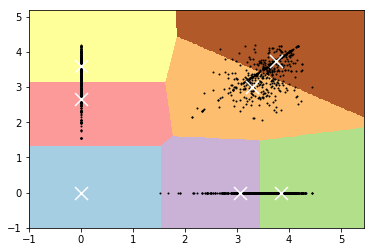

In [48]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data = np.array(cluster_reduit[['Drama','Comedy']])

n_samples, n_features = data.shape



kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
kmeans.fit(data)

h = .02 

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#  color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


plt.show()


# Clustering 2

In [49]:
from scipy.sparse import csr_matrix
import helper

In [50]:
genre_ratings = helper.get_genre_ratings(ratings_pd, movies_pd, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

avg_romance_rating  avg_scifi_rating
1                3.95              3.71
2                3.83              4.61
3                4.06              4.00
4                3.50              3.00
5                3.94              4.60

In [51]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  302


index  avg_romance_rating  avg_scifi_rating
0      4                3.50              3.00
1      8                3.95              3.18
2      9                4.00              2.67
3     15                3.33              3.00
4     18                3.88              2.45

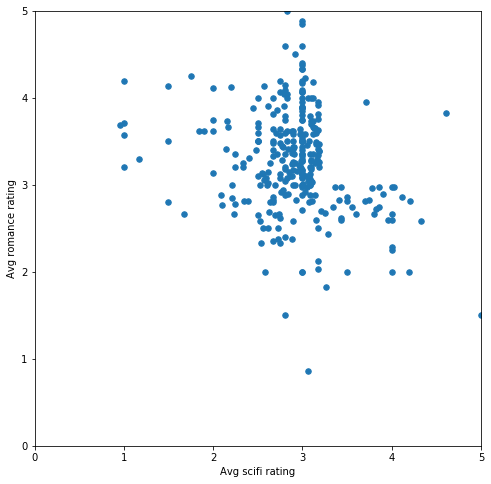

In [52]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [53]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values


In [54]:
X

array([[3.  , 3.5 ],
       [3.18, 3.95],
       [2.67, 4.  ],
       [3.  , 3.33],
       [2.45, 3.88],
       [3.  , 3.  ],
       [3.18, 3.92],
       [2.25, 2.78],
       [2.73, 2.38],
       [3.96, 2.6 ],
       [2.83, 5.  ],
       [2.75, 3.08],
       [2.67, 2.83],
       [2.8 , 3.18],
       [3.03, 4.23],
       [1.17, 3.3 ],
       [2.9 , 3.41],
       [2.58, 2.  ],
       [2.14, 3.41],
       [3.12, 4.  ],
       [3.9 , 2.9 ],
       [4.12, 2.86],
       [3.  , 3.8 ],
       [2.75, 3.64],
       [3.  , 2.71],
       [3.12, 3.35],
       [3.17, 3.34],
       [2.  , 3.14],
       [2.9 , 3.5 ],
       [3.  , 3.75],
       [3.1 , 3.73],
       [3.14, 3.65],
       [2.39, 2.81],
       [2.88, 3.24],
       [2.85, 3.15],
       [3.  , 3.17],
       [2.35, 2.81],
       [3.19, 3.26],
       [3.01, 3.01],
       [2.98, 3.19],
       [2.83, 4.04],
       [2.75, 3.57],
       [1.9 , 3.62],
       [2.5 , 3.71],
       [3.15, 3.6 ],
       [5.  , 1.5 ],
       [3.15, 2.6 ],
       [3.13,

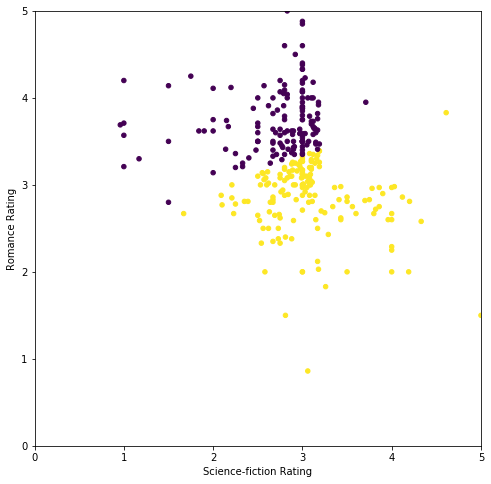

In [55]:
from sklearn.cluster import KMeans 
kmeans_1 = KMeans(n_clusters=2)
predictions = kmeans_1.fit_predict(X)
helper.draw_clusters(biased_dataset, predictions)

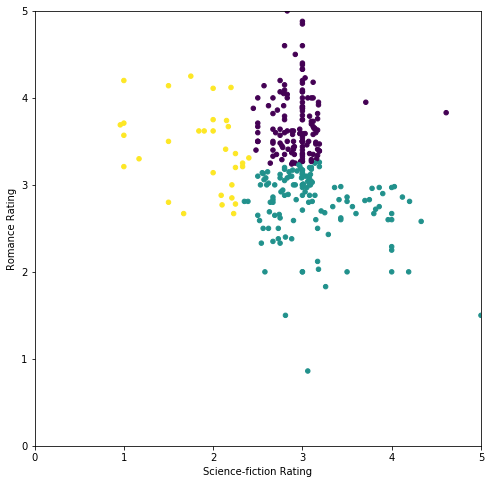

In [56]:

# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

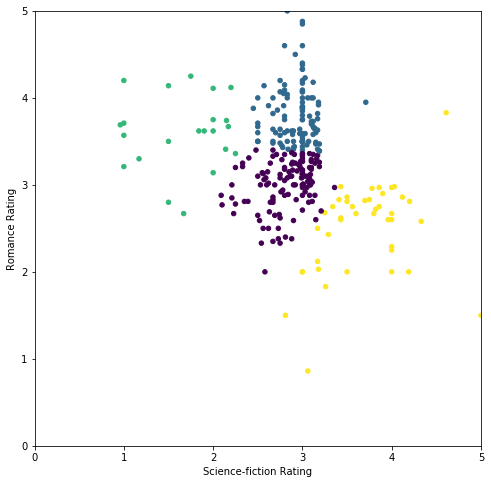

In [57]:

# Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters =4)

#  use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

In [58]:
possible_k_values = range(2, len(X)+1, 5)

errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

/home/pwned/.local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (283) found smaller than n_clusters (287). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/pwned/.local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (283) found smaller than n_clusters (292). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/pwned/.local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (283) found smaller than n_clusters (297). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/pwned/.local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (283) found smaller than n_clusters (302). Possibly due to duplicate points in X.
  return_n_iter=True)


In [59]:
list(zip(possible_k_values, errors_per_k))

[(2, 0.34007181720456087),
 (7, 0.36247532663577475),
 (12, 0.3722945469664764),
 (17, 0.3705970751847328),
 (22, 0.399869852894677),
 (27, 0.3728107108097174),
 (32, 0.37688242932326693),
 (37, 0.379324592900272),
 (42, 0.37537913077996027),
 (47, 0.3951932744578532),
 (52, 0.3940451872886359),
 (57, 0.4010471585854594),
 (62, 0.4021776233318627),
 (67, 0.4069076841274569),
 (72, 0.3912191876996881),
 (77, 0.40743868777883757),
 (82, 0.40259898296610386),
 (87, 0.40549465431510984),
 (92, 0.3951090395068754),
 (97, 0.39623156302735985),
 (102, 0.4096217819359031),
 (107, 0.4085072163828666),
 (112, 0.40939435058675994),
 (117, 0.40264719305993113),
 (122, 0.40646983673811077),
 (127, 0.4016097143086396),
 (132, 0.39962444508148404),
 (137, 0.3980794717329055),
 (142, 0.39326743637091066),
 (147, 0.3928693450382388),
 (152, 0.3843634767625072),
 (157, 0.38925891233722254),
 (162, 0.37898969347647754),
 (167, 0.3619826712440982),
 (172, 0.3773920614742726),
 (177, 0.3613582131254285),
 

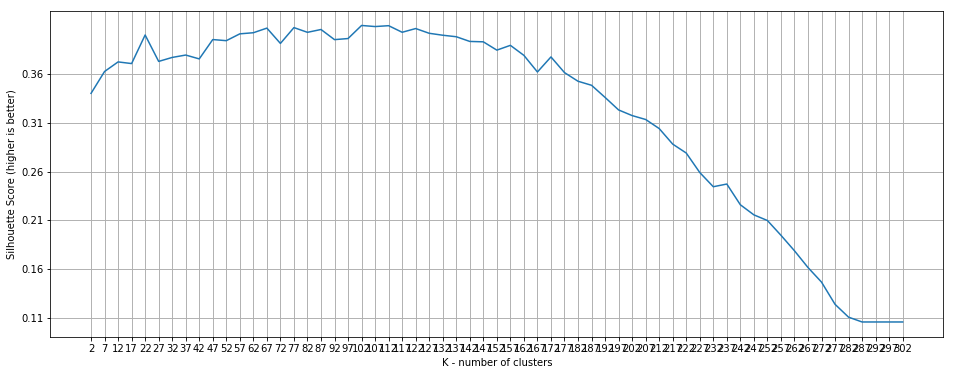

In [60]:

fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

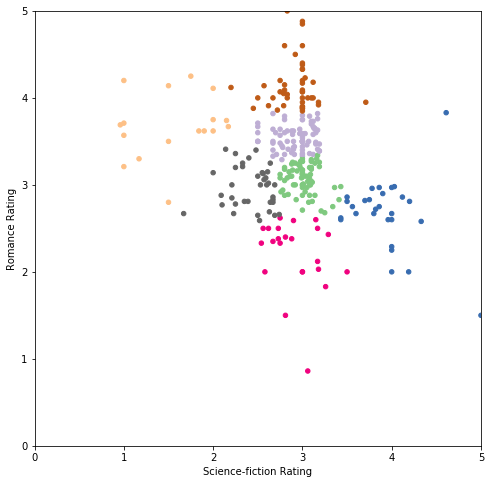

In [61]:
kmeans_4 = KMeans(n_clusters=7)

predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')





In [62]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings_pd, movies_pd, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  302


index  avg_romance_rating  avg_scifi_rating  avg_action_rating
0      4                3.50              3.00               3.54
1      8                3.95              3.18               3.63
2      9                4.00              2.67               3.20
3     15                3.33              3.00               2.73
4     18                3.88              2.45               2.54

In [63]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

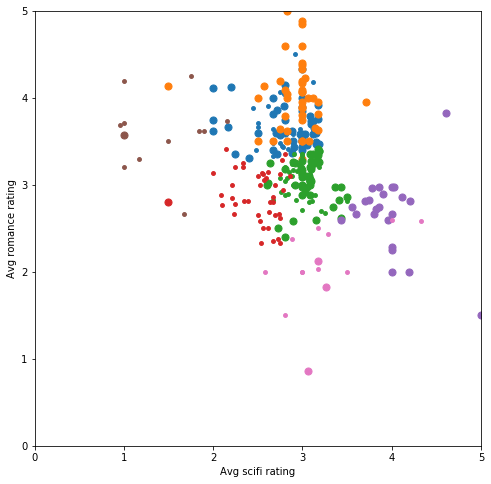

In [64]:
kmeans_5 = KMeans(n_clusters=7)

predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

# Problématique :

In [65]:
movies = pd.read_csv("./MovieLens-20M/movies.csv", encoding='utf8')
ratings = pd.read_csv("./MovieLens-20M/ratings.csv", encoding='utf-8')
tags = pd.read_csv("./MovieLens-20M/tags.csv", encoding='utf-8')
links = pd.read_csv("./MovieLens-20M/links.csv", encoding='utf-8')

In [66]:
fActeur = "./TMdb/act_v2.pkl"
fCrew = "./TMdb/crew_v2.pkl"
fFilm = "./TMdb/film_v2.pkl"

acteurs = pkl.load(open(fActeur, "rb"))
crews = pkl.load(open(fCrew, "rb"))
films = pkl.load(open(fFilm, "rb"))

In [67]:
def to_movieId(tmdbId) :
    try :
        return True, links.loc[links["tmdbId"] == tmdbId,:]["movieId"].tolist()[0]
    except IndexError :
        return False , tmdbId
    
    
# Fonction qui prends en entrer un movieId et Rends (True,tmdbId) s'il existe dans la tables links False sinon
def to_tmdbId(movieId) :
    try : 
        return True, links.loc[links["movieId"] == movieId,:]["tmdbId"].tolist()[0]
    except IndexError :
        return False, movieId
    
    
# Fonction prends tmdbId et rends la date de sortie du film 
def date_tmdb(tmdb) :
    annee = []
    for i in range(len(films)) :
        if films[i]["id"] == tmdb :
            annee.append(films[i]["release_date"].split("-")[0])
    if annee == [] :
        return True , 1990
    else:
        return True, annee[0]
    

In [68]:
# Supprimer dans la base Tmdb  les films qui n'ont pas d'identifiantdans movieId correspondant dans la table Links 

movieId  = [to_movieId(film["id"])[1] for film in films if to_movieId(film["id"])[0]]

nb_films = 0
for film in films :
    if to_movieId(film["id"])[0] == False :
        nb_films += 1
        films.remove(film)
print("le nombre de films qui sont supprimés et qui ont une valeur null dans Links : {}".format(nb_films))
        

le nombre de films qui sont supprimés et qui ont une valeur null dans Links : 222


In [69]:
# Supprimer les films qui n'ont aucune note dans la base MovieLens

movieId = ratings["movieId"].unique().tolist()

movies_size = len(movies)

movies = movies[movies["movieId"].isin(movieId)]

print(" {} films qui sont dans la base MovieLens et qui n'ont aucune note, sont donc supprimés".format(movies_size - len(movies)))


 534 films qui sont dans la base MovieLens et qui n'ont aucune note, sont donc supprimés


In [70]:
# Supprimer dans moviesLens les films qui n'apparissent pas dans la base Tmbd 

movieId = [to_movieId(film["id"])[1] for film in films if to_movieId(film["id"])[0]]

movies_size = len(movies)
tags_size = len(tags)
ratings_size = len(ratings)

movies = movies[movies["movieId"].isin(movieId)]
tags = tags[tags["movieId"].isin(movieId)]
ratings = ratings[ratings["movieId"].isin(movieId)]

print(" {} films ont été supprimés dans la base MovieLens".format(movies_size - len(movies)))
print(" {} tags ont été supprimés dans la base MovieLens".format(tags_size - len(tags)))
print(" {} notes ont été supprimés dans la base MovieLens".format(ratings_size - len(ratings)))

 575 films ont été supprimés dans la base MovieLens
 4008 tags ont été supprimés dans la base MovieLens
 59001 notes ont été supprimés dans la base MovieLens


In [71]:
# Supprimer dans Tmbd les films qui n'apparissent pas dans la base moviesLens 

tmdbId = [to_tmdbId(movieId)[1] for movieId in movies["movieId"].tolist() if to_tmdbId(movieId)[0]]

filmsId_a_supprimer  = [films[i] for i in range(len(films)) if not(films[i]["id"] in tmdbId)]

for elem in filmsId_a_supprimer :
    try :
        films.remove(elem)    
        acteurs.remove(elem)
        crews.remove(elem)
        
    except ValueError :
        pass
        
print("{} films ont été supprimer dans la base Tmdb ainsi que les participants".format(len(filmsId_a_supprimer)))
print("la base MovieLens contients {} films ".format(len(movies)))
print("la base Tmdb contients {} films ".format(len(movies)))

517 films ont été supprimer dans la base Tmdb ainsi que les participants
la base MovieLens contients 26169 films 
la base Tmdb contients 26169 films 


In [72]:
# Garder seulement les données utils dans le DataFrame rating

#ratings = ratings[["movieId", "rating"]]

# Calculer le nombre de valeur null
print("le nombre de valeur null dans ratings : \n{}".format(ratings.isnull().sum()))

# Calculer la note moyenne et le nombre de votant de chaque film dans la base MovieLens
ratings = pd.DataFrame({"movieId" : ratings["movieId"].unique(),
"vote_average" : ratings.groupby("movieId").mean()["rating"].tolist(),
"vote_count" : ratings.groupby("movieId").count()["rating"].tolist()
    })
ratings.head()

le nombre de valeur null dans ratings : 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


movieId  vote_average  vote_count
0        2      3.921240       49695
1       29      3.211977       22243
2       32      3.151040       12735
3       47      2.861393        2756
4       50      3.064592       12161

In [73]:
# Calculer pour chaque genre le nombre de film associe
genre = {}
for listeGenre in movies["genres"] :
    for g in listeGenre.split("|") :
        if not (g in genre) :
            genre[g] = 1
        else:
            genre[g] += 1
print(genre)


{'Adventure': 2223, 'Animation': 973, 'Children': 1105, 'Comedy': 8112, 'Fantasy': 1358, 'Romance': 3965, 'Drama': 12800, 'Action': 3411, 'Crime': 2843, 'Thriller': 4078, 'Horror': 2555, 'Mystery': 1453, 'Sci-Fi': 1670, 'IMAX': 194, 'Documentary': 2252, 'War': 1142, 'Musical': 993, 'Western': 645, 'Film-Noir': 321, '(no genres listed)': 229}


In [74]:
# Numérisation des genres
# Séparation de titre et annee
# Completer les champs vides annees avec les annees coresspondants dans la base Tmdb
dic = {
    "movieId" : [],
    "title" : [],
    "annee" : []
}

            
for g in genre.keys() :
    dic[g] = [0]*len(movies)

for i in range(len(movies)) :
    ligne = movies.iloc[i]
    dic["movieId"].append(ligne["movieId"])
    dic["title"].append(ligne["title"].split("(")[0])
    try :
        try :
            annee = int((ligne["title"].split("(")[-1]).split(")")[0])
            dic["annee"].append(annee)
        except ValueError :
            dic["annee"].append(date_tmdb(to_tmdbId(ligne["movieId"])))
                                
    except IndexError :
        pass
    
    for gen in ligne["genres"].split("|") :
        dic[gen][i] = 1
        
movies_genre = pd.DataFrame(dic)
movies_genre.head()

movieId                         title annee  Adventure  Animation  \
0        1                    Toy Story   1995          1          1   
1        2                      Jumanji   1995          1          0   
2        3             Grumpier Old Men   1995          0          0   
3        4            Waiting to Exhale   1995          0          0   
4        5  Father of the Bride Part II   1995          0          0   

   Children  Comedy  Fantasy  Romance  Drama  ...  Horror  Mystery  Sci-Fi  \
0         1       1        1        0      0  ...       0        0       0   
1         1       0        1        0      0  ...       0        0       0   
2         0       1        0        1      0  ...       0        0       0   
3         0       1        0        1      1  ...       0        0       0   
4         0       1        0        0      0  ...       0        0       0   

   IMAX  Documentary  War  Musical  Western  Film-Noir  (no genres listed)  
0     0            0    0        0        0          0                   0  
1     0            0    0        0        0          0                   0  
2     0            0    0        0        0          0                   0  
3     0            0    0        0        0          0                   0  
4     0            0    0        0        0          0                   0  

[5 rows x 23 columns]

In [75]:
# Verifier et afficher le nombre de valeur nulle du champ popularite dans la base Tmdb 
# Affecter la valeur "un" au films dont le champ popularity n'est pas present 
# car dans notre cas le file a au moins une note donc logiquement il est vu par aux moins une personne

indice_popularity_nul = []
for i in range(len(films)) :
    if not("popularity" in list(films[i].keys())) :
        films[i]["popularity"] = 1
        indice_popularity_nul.append(i)
        
print("le nombre de valeur nulle  de popularity dans la base Tmdb : {}".format(len(indice_popularity_nul)))



le nombre de valeur nulle  de popularity dans la base Tmdb : 2


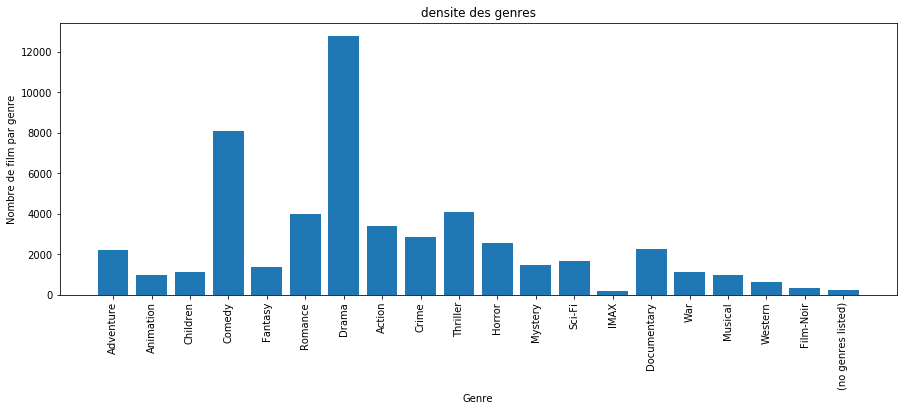

In [76]:
# Visualisation des données genres 

plt.figure(figsize=(15,5))
plt.bar(list(genre.keys()), genre.values())
plt.xticks(rotation='vertical')
plt.title('densite des genres')
plt.xlabel('Genre')
plt.ylabel('Nombre de film par genre')
plt.show()

In [77]:
# Jointer la table movies avec la table ratings de la la base MovieLens
movies = movies_genre.set_index("movieId").join(ratings.set_index("movieId"))
movies.head()

title annee  Adventure  Animation  Children  \
movieId                                                                       
1                          Toy Story   1995          1          1         1   
2                            Jumanji   1995          1          0         1   
3                   Grumpier Old Men   1995          0          0         0   
4                  Waiting to Exhale   1995          0          0         0   
5        Father of the Bride Part II   1995          0          0         0   

         Comedy  Fantasy  Romance  Drama  Action  ...  Sci-Fi  IMAX  \
movieId                                           ...                 
1             1        1        0      0       0  ...       0     0   
2             0        1        0      0       0  ...       0     0   
3             1        0        1      0       0  ...       0     0   
4             1        0        1      1       0  ...       0     0   
5             1        0        0      0       0  ...       0     0   

         Documentary  War  Musical  Western  Film-Noir  (no genres listed)  \
movieId                                                                      
1                  0    0        0        0          0                   0   
2                  0    0        0        0          0                   0   
3                  0    0        0        0          0                   0   
4                  0    0        0        0          0                   0   
5                  0    0        0        0          0                   0   

         vote_average  vote_count  
movieId                            
1            2.952470       32085  
2            3.921240       49695  
3            3.388000         500  
4            2.510966        2143  
5            3.867795        6853  

[5 rows x 24 columns]

In [78]:
# Ajouter au DataFrame movies une colonne qui correspond à la popularité de chaque film depuis la base Tmdb 

dic = {
    "movieId" : [],
    "popularity" : []
}

for elem in films :
    dic["movieId"].append(to_movieId(elem["id"])[1])
    dic["popularity"].append(elem["popularity"])

movies = movies.join(pd.DataFrame(dic).set_index("movieId"))

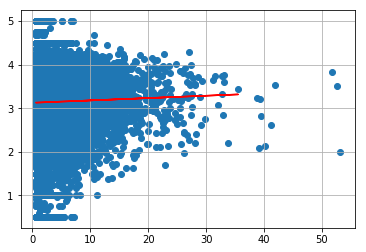

-20000 exemple pour l'apprentissage contre 
-6169 exemple pour le test
-valeur de l'echantillon : 1
-le taux de precision de la regression entre popularity et note moyenne : 90 %



-20000 exemple pour l'apprentissage contre 
-6169 exemple pour le test
-valeur de l'echantillon : 1.5
-le taux de precision de la regression entre popularity et note moyenne : 96 %


In [79]:
# Faire une regression pour predir la note moyenne a partir de la valeur de popularité

# Importer la fonction stats de la bibliotheque scipy
from scipy import stats

# Preparer la base avec seulement les champ dont on a besoin pour la regression
data = movies[["popularity", "vote_average"]]


# Premierement on fait la regression entre le chmaps "Popularity" et "note_moyenne"
# On divise notre base en deux parties 20000 exemple pour l'entrainement et le reste pour le test

#selection de la première colonne de notre dataset (popularity)
#selection de deuxième colonnes de notre dataset (note_moyenne)

XTrain = data[:2000].iloc[:,0]
YTrain = data[:2000].iloc[:,1]

XTest = data[2000:].iloc[:,0]
YTest = data[2000:].iloc[:,1]

# dessiner une grille pour une meilleur lisibilité du graphe
axes = plt.axes()
axes.grid()
plt.scatter(data.iloc[:,0],data.iloc[:,1])

# Entrainer le modele 
slope, intercept, r_value, p_value, std_err = stats.linregress(XTrain, YTrain)

def predict(x):
    return slope * x + intercept

def accuracy(yTest, xTest, echant) :
    listeX = xTest.tolist()
    listeY = yTest.tolist()
    somme = 0
    for i in range(0,len(listeX)) :
        yPred = predict(listeX[i])
        if (yPred <= listeY[i] + echant) and (yPred >= listeY[i] - echant) :
            somme += 1
    return somme / len(listeX) *100


# Entrainer le modele 
fitLine = predict(XTrain)
plt.plot(XTrain, fitLine, "r")
plt.show()

# Calculer le teaux de precision pour l'echantillon = 1
print("-20000 exemple pour l'apprentissage contre \n-6169 exemple pour le test\n-valeur de l'echantillon : 1")
print("-le taux de precision de la regression entre popularity et note moyenne : {} %".format(round(accuracy(YTest, XTest, 1))))



# Calculer le teaux de precision pour l'echantillon = 1.5
print("\n\n\n-20000 exemple pour l'apprentissage contre \n-6169 exemple pour le test\n-valeur de l'echantillon : 1.5")
print("-le taux de precision de la regression entre popularity et note moyenne : {} %".format(round(accuracy(YTest, XTest, 1.5))))



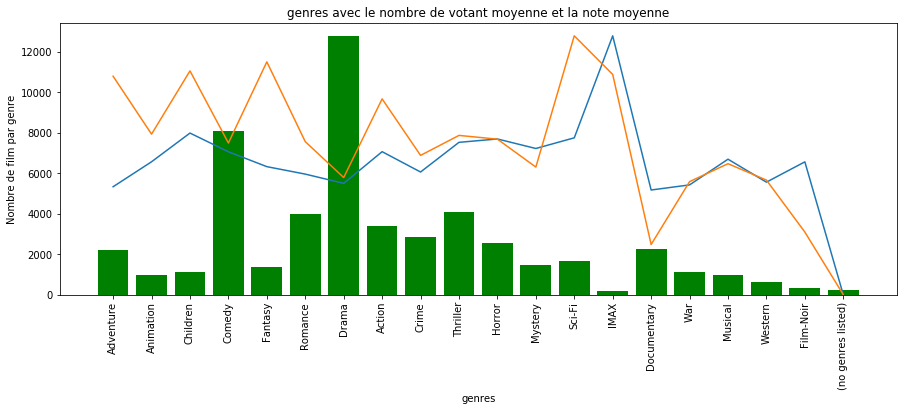

In [80]:
# Normaliser et  afficher la note moyenne et le nombre de votant moyenne des films associe a chaque genre 

def normaliser(liste, max_norm, min_norm) :
    new_liste = []
    min_liste = np.min(np.array(liste))
    max_liste = np.max(np.array(liste))
    for elem in liste :
        new_liste.append((((elem - min_liste)/(max_liste - min_liste)) )*max_norm)
    return new_liste

lgenre = list(genre.keys())
lnote_moyenne = []
lnb_votant = []

max_val = np.max(np.array(list(genre.values())))
min_val = 0

for elem in lgenre :
    df = movies[movies[elem].isin([1])][[elem, "vote_average", "vote_count"]]
    lnote_moyenne.append(sum(df["vote_average"])/len(df))
    lnb_votant.append(sum(df["vote_count"])/len(df))

plt.figure(figsize=(15,5))
plt.bar(list(genre.keys()), genre.values(), color="green")
plt.xticks(rotation='vertical')
plt.title('genres avec le nombre de votant moyenne et la note moyenne')
plt.xlabel('genres')
plt.ylabel('Nombre de film par genre')
plt.plot(normaliser(lnote_moyenne, max_val, min_val))
plt.plot(normaliser(lnb_votant, max_val, min_val))
plt.show()

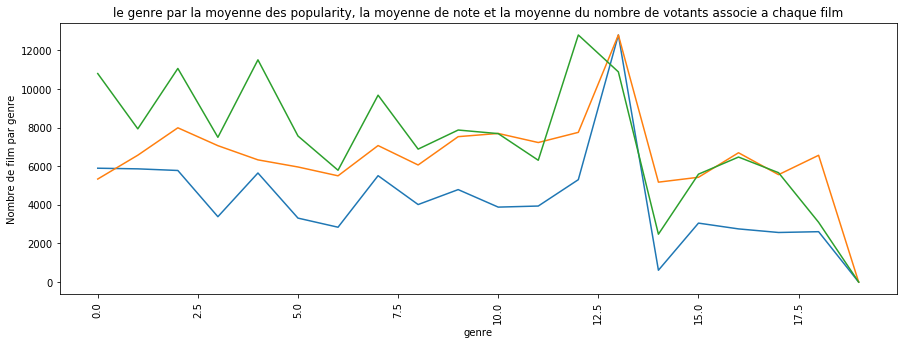

In [81]:
# Affichage des moyenne de vote, popularite et nombre de votant asocie a chaque genre

lgenre = list(genre.keys())
lnote_moyenne = []
lnb_votant = []
lpopu_moyenne = []

max_val = np.max(np.array(list(genre.values())))
min_val = 0

for elem in lgenre :
    df = movies[movies[elem].isin([1])][[elem, "vote_average", "vote_count", "popularity"]]
    lnote_moyenne.append(sum(df["vote_average"])/len(df))
    lnb_votant.append(sum(df["vote_count"])/len(df))
    lpopu_moyenne.append(sum(df["popularity"])/len(df))


plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
plt.title('le genre par la moyenne des popularity, la moyenne de note et la moyenne du nombre de votants associe a chaque film')
plt.xlabel('genre')
plt.ylabel('Nombre de film par genre')

plt.plot(normaliser(lpopu_moyenne, max_val, min_val))
plt.plot(normaliser(lnote_moyenne, max_val, min_val))
plt.plot(normaliser(lnb_votant, max_val, min_val))
plt.show()
    